# PREPROCESSING

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

### Proteins.csv

In [2]:
protein_df = pd.read_csv('proteins_new.csv')
protein_df.head()

,ACTG1,TUBB4B,HBB,GAPDH,HBA2,SPTAN1,DPYSL2,SPTBN1,CKB,PKM,...,AGFG2,PTRH2,TMED5,PODXL2,CUL4A,REEP6,NPC1,DSCR3,HAX1,VKORC1L1
0,0.000416,-0.088755,0.157828,0.072899,0.154047,-0.045855,0.065950,-0.015957,-0.039686,0.081944,...,-0.086443,0.000000,-0.633261,0.159727,0.000000,0.429527,-0.001607,0.590137,-0.116056,0.0
1,-0.054160,-0.067824,-0.827798,-0.007606,-0.956292,-0.035560,0.001286,0.005202,-0.121929,-0.071066,...,0.034060,0.000000,-0.087358,-0.002128,0.000000,-0.011036,0.000000,0.000000,-0.171433,0.0
2,0.100341,0.084958,-0.050724,-0.023540,-0.050428,0.022052,0.014256,-0.000139,0.012872,0.162457,...,0.000000,-0.410899,-0.177223,0.000000,-0.179217,-0.527957,0.000000,-0.790274,0.000000,0.0
3,0.023625,0.072881,-0.675763,0.136452,-0.563935,-0.072983,0.189760,-0.020462,0.114658,0.092396,...,-0.332790,0.000000,0.000000,0.000000,0.000000,0.213148,0.000000,-0.128936,0.000000,0.0
4,-0.067120,-0.044365,-1.104865,0.012224,-1.276744,0.090556,0.018954,0.044539,-0.107376,0.079172,...,0.591717,1.484447,0.000000,0.261398,0.000000,0.234530,0.000000,0.623527,0.023670,0.0


### new_metadata.csv

In [3]:
new_metadata_df = pd.read_csv('new_metadata.csv', low_memory=False)
new_metadata_df.head(10)

,Sample,GSM3577568,GSM3577569,GSM3577570,GSM3577571,GSM3577572,GSM3577573,GSM3577574,GSM3577575,GSM3577576,...,GSM3561954,GSM3561955,GSM1644996,GSM1644997,GSM1644998,GSM1644999,GSM1645000,GSM1645001,GSM1645002,GSM1645003
0,Age,93,77,92,85,83,85,93,96,96,...,93,84,82,87,83,82,77,83,>90,85
1,Sex,Female,Male,Male,Male,Male,Male,Female,Male,Female,...,Male,Female,Female,Female,Male,Female,Female,Male,Male,Female
2,Diagnosis,Alzheimer's disease,Alzheimer's disease,Alzheimer's disease,Alzheimer's disease,Alzheimer's disease,Alzheimer's disease,Alzheimer's disease,Alzheimer's disease,Alzheimer's disease,...,Control,Alzheimer's disease,Alzheimer's disease,Alzheimer's disease,Alzheimer's disease,Alzheimer's disease,Control,Control,Control,Control
3,Tissue,Brain; fusiform gyrus,Brain; fusiform gyrus,Brain; fusiform gyrus,Brain; fusiform gyrus,Brain; fusiform gyrus,Brain; fusiform gyrus,Brain; fusiform gyrus,Brain; fusiform gyrus,Brain; fusiform gyrus,...,Brain; superior frontal gyrus; endothelial cell,Brain; superior frontal gyrus; astrocyte cell,Brain; hippocampus,Brain; hippocampus,Brain; hippocampus,Brain; hippocampus,Brain; hippocampus,Brain; hippocampus,Brain; hippocampus,Brain; hippocampus
4,Batch,1,1,1,1,1,1,1,1,1,...,3,3,11,11,11,11,11,11,11,11
5,N_multimapping,4277036,3816507,3880224,4380642,3720851,3371381,2805844,4233022,2300655,...,5603607,2567535,2957121,2439653,2405099,2307171,4135669,5614210,2882250,2412448
6,N_noFeature,8048774,7974872,8323017,9230817,8155090,7162028,5769016,8686875,4320515,...,13577961,16802281,7063871,8915129,9223745,9649651,6793496,5590204,7617401,7601952
7,N_ambiguous,127177,124874,111939,114212,124790,111628,157165,125132,180796,...,26486,43464,177094,107816,119035,140693,171675,95123,142031,137813
8,DDX11L1,4,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,WASH7P,3,2,1,3,5,6,5,1,1,...,0,0,7,9,12,5,12,6,16,15


### Reading proteins from files : Young_Proteins.csv, Middle_Proteins.csv, Old_Proteins.csv

In [4]:
# Function to read protein lists from files
def read_protein_list(file_path):
    with open(file_path, 'r') as file:
        proteins = file.read().splitlines()
    return proteins
    
# Define file paths
young_proteins_path = 'Young_Proteins.csv'
middle_age_proteins_path = 'Middle_Proteins.csv'
old_proteins_path = 'Old_Proteins.csv'

In [5]:
# Read the protein lists
young_proteins = read_protein_list(young_proteins_path)
middle_age_proteins = read_protein_list(middle_age_proteins_path)
old_proteins = read_protein_list(old_proteins_path)

#print("Protein DataFrame Columns:", protein_df.columns.tolist())
#print("Young Proteins List:", young_proteins)
#print("Middle Age Proteins List:", middle_age_proteins)
#print("Old Proteins List:", old_proteins)

# Normalization

In [12]:
# Normalize column names
protein_df.columns = protein_df.columns.str.strip().str.upper()

# Normalize protein lists
young_proteins = [protein.strip().upper() for protein in young_proteins]
middle_age_proteins = [protein.strip().upper() for protein in middle_age_proteins]
old_proteins = [protein.strip().upper() for protein in old_proteins]

# Print normalized lists to verify
print("Normalized Young Proteins List:", young_proteins)
print("Normalized Middle Age Proteins List:", middle_age_proteins)
print("Normalized Old Proteins List:", old_proteins)

Normalized Young Proteins List: ['\ufeffYOUNG PROTEINS', 'MAPT', 'AAK1', 'RPL37A', 'TIMM44', 'SERINC1', 'ALDH3A2', 'SSPO', 'SNCB', 'AGAP2', 'CPLX1', 'HSPA12A', 'INA', 'SSR1', 'SRGAP2', 'ALDH9A1', 'STXBP5L', 'FARSB', 'NDUFA5', 'VGF', 'NDUFS8', 'TLN1', 'DDAH2', 'SEC31A', 'SLC25A25', 'PMPCA', 'TOM1L2', 'AGRN', 'AARS', 'NDUFA9', 'ABR', 'CYCS', 'SYNGAP1', 'SLC25A46', 'SMC1A', 'SH3BGRL', 'HIST2H2AA4', 'LETM1', 'ENO2', 'SEPT5', 'RBM14', 'PBXIP1', 'COX7C', 'ESD', 'COX7A2L', 'FKBP1A', 'ITSN1', 'NADK2', 'SUCLA2', 'WASL', 'VCP', 'NDUFS1', 'ADD3', 'PDCD5', 'BAIAP2', 'ARRB1', 'BLVRB', 'CYC1', 'NUMBL', 'NONO', 'RPH3A', 'STRN', 'MSN', 'ADCYAP1R1', 'SRPK2', 'ACAT2', 'NAPG', 'HSPA1B', 'PGLS', 'NPY', 'LMNB2', 'SOGA3', 'HSPB8', 'FHL1', 'SPTBN4', 'NDUFB6', 'DUSP3', 'PPM1H', 'XPO1', 'SFXN1', 'ATP2A2', 'GABRB3', 'SNAP25', 'CAPG', 'ABHD14B', 'LMNA', 'EPS15L1', 'NDUFS2', 'LTA4H', 'NAGK', 'CYFIP1', 'PFDN2', 'SACM1L', 'DPYSL3', 'PLEC', 'PDK3', 'GSK3A', 'PSMA6', 'PFDN5', 'SYNPO', 'PPP2R5D']
Normalized Middle Age

In [13]:
normalized_young_proteins = ['MAPT', 'AAK1', 'RPL37A', 'TIMM44', 'SERINC1', 'ALDH3A2', 'SSPO', 'SNCB', 'AGAP2', 'CPLX1', 'HSPA12A', 'INA', 'SSR1', 'SRGAP2', 'ALDH9A1', 'STXBP5L', 'FARSB', 'NDUFA5', 'VGF', 'NDUFS8', 'TLN1', 'DDAH2', 'SEC31A', 'SLC25A25', 'PMPCA', 'TOM1L2', 'AGRN', 'AARS', 'NDUFA9', 'ABR', 'CYCS', 'SYNGAP1', 'SLC25A46', 'SMC1A', 'SH3BGRL', 'HIST2H2AA4', 'LETM1', 'ENO2', 'SEPT5', 'RBM14', 'PBXIP1', 'COX7C', 'ESD', 'COX7A2L', 'FKBP1A', 'ITSN1', 'NADK2', 'SUCLA2', 'WASL', 'VCP', 'NDUFS1', 'ADD3', 'PDCD5', 'BAIAP2', 'ARRB1', 'BLVRB', 'CYC1', 'NUMBL', 'NONO', 'RPH3A', 'STRN', 'MSN', 'ADCYAP1R1', 'SRPK2', 'ACAT2', 'NAPG', 'HSPA1B', 'PGLS', 'NPY', 'LMNB2', 'SOGA3', 'HSPB8', 'FHL1', 'SPTBN4', 'NDUFB6', 'DUSP3', 'PPM1H', 'XPO1', 'SFXN1', 'ATP2A2', 'GABRB3', 'SNAP25', 'CAPG', 'ABHD14B', 'LMNA', 'EPS15L1', 'NDUFS2', 'LTA4H', 'NAGK', 'CYFIP1', 'PFDN2', 'SACM1L', 'DPYSL3', 'PLEC', 'PDK3', 'GSK3A', 'PSMA6', 'PFDN5', 'SYNPO', 'PPP2R5D']

normalized_middle_age_proteins = ['VGF', 'LTA4H', 'APP', 'C4B', 'NDRG3', 'RPL9', 'TPM3', 'NNT', 'SEC22B', 'SMC1A', 'MECP2', 'HEBP2', 'PPP2R5D', 'HINT2', 'GNAI1', 'IDH2', 'RALA', 'CAPG', 'SIRPA', 'LRRC40', 'PSMB1', 'PAFAH1B3', 'SEPT5', 'BDH1', 'KRAS', 'NPEPPS', 'ACTN4', 'RPH3A', 'TUBB', 'AKR1B1', 'DNM1L', 'DCLK1', 'ITGB1', 'HNRNPH3', 'NDUFV3', 'ACOT9', 'UQCRC1', 'MAPT', 'APOO', 'CAP2', 'ACTN2', 'SEPT7', 'GFAP', 'NCAN', 'CHMP3', 'TCEAL6', 'DPP6', 'NDUFV1', 'ATP1A2', 'RABGGTA', 'SUCLG2', 'NRBP1', 'DPYSL3', 'GLS', 'EPB41L3', 'S100A4', 'GMPR', 'ACTR1B', 'TNR', 'DLAT', 'NDUFA2', 'OLFM1', 'NDUFS1', 'ITGB8', 'FABP5', 'SGIP1', 'DIAPH2', 'SUCLG1', 'WFS1', 'YWHAH', 'CUL5', 'SYT12', 'HNRNPA1', 'CPNE6', 'CACNA2D1', 'ARL8B', 'PEA15', 'PPT1', 'ATP5A1', 'HDHD3', 'NDRG4', 'KIAA1045', 'CAPN2', 'ERC2', 'S100A16', 'SLC25A11', 'NRN1', 'PLXNA4', 'DST', 'PLCL2', 'SLC30A3', 'ASNA1', 'PGLS', 'LRPPRC', 'PLCD3', 'NUDC', 'MCEE', 'IGLON5', 'DDX1', 'ATP5O']

normalized_old_proteins = ['APP', 'ACAT2', 'LRP1', 'DDX17', 'FAM126B', 'PLXNA1', 'NRXN1', 'HSPB1', 'ABR', 'PBXIP1', 'CD200', 'SRI', 'UGP2', 'ITPK1', 'SSR3', 'IDH2', 'GNAI1', 'NME2', 'IGLON5', 'DHX15', 'TIMM13', 'PCSK1', 'FASN', 'CADM3', 'MPC1', 'GOSR2', 'CAPNS1', 'ARL1', 'SRPRB', 'LTA4H', 'FAM175B', 'CRTAC1', 'TICAM2', 'AIP', 'CORO1A', 'P2RX7', 'COMMD2', 'PADI2', 'CAMKK1', 'RABEP1', 'PLLP', 'DLG3', 'EPS15L1', 'HRAS', 'RUVBL1', 'DHRS11', 'SLC2A3', 'GUCY1A2', 'KHDRBS3', 'GPS1', 'CD44', 'RAB35', 'HNRNPH1', 'FBXO2', 'GLRX3', 'LAMTOR2', 'HSD17B8', 'MAL2', 'EIF5B', 'CCDC58', 'SNX1', 'CROCC', 'SLC30A1', 'CMTM5', 'FABP7', 'DMXL1', 'FDPS', 'PPT1', 'MMS19', 'CRMP1', 'SLC25A4', 'UBR3', 'PAFAH1B3', 'PTRHD1', 'TPP1', 'HIGD1A', 'PSMD14', 'ITM2B', 'HPRT1', 'DUSP3', 'RAD23B', 'RPN2', 'DNM1L', 'GABARAP', 'MAN2C1', 'GNAI2', 'STIP1', 'TPM4', 'CAPG', 'SLC30A9', 'AARS', 'GABRG2', 'SERPINB6', 'COPA', 'EEF2', 'ISOC2', 'PLXNA4', 'STX1A', 'NRXN3', 'C12ORF5']


In [14]:
# Print column names in protein_df
print(protein_df.columns)

Index(['ACTG1', 'TUBB4B', 'HBB', 'GAPDH', 'HBA2', 'SPTAN1', 'DPYSL2', 'SPTBN1',
       'CKB', 'PKM',
       ...
       'AGFG2', 'PTRH2', 'TMED5', 'PODXL2', 'CUL4A', 'REEP6', 'NPC1', 'DSCR3',
       'HAX1', 'VKORC1L1'],
      dtype='object', length=3331)


In [15]:
# Check for any mismatched column names
missing_columns_young = [col for col in normalized_young_proteins if col not in protein_df.columns]
missing_columns_middle_age = [col for col in normalized_middle_age_proteins if col not in protein_df.columns]
missing_columns_old = [col for col in normalized_old_proteins if col not in protein_df.columns]

print("Missing columns in young proteins list:", missing_columns_young)
print("Missing columns in middle age proteins list:", missing_columns_middle_age)
print("Missing columns in old proteins list:", missing_columns_old)

Missing columns in young proteins list: ['MAPT', 'SEPT5']
Missing columns in middle age proteins list: ['SEPT5', 'MAPT', 'SEPT7']
Missing columns in old proteins list: []


# Filtering and Segregation

In [16]:
# Updated lists after removing missing columns
normalized_young_proteins = ['AAK1', 'RPL37A', 'TIMM44', 'SERINC1', 'ALDH3A2', 'SSPO', 'SNCB', 'AGAP2', 'CPLX1', 'HSPA12A', 'INA', 'SSR1', 'SRGAP2', 'ALDH9A1', 'STXBP5L', 'FARSB', 'NDUFA5', 'VGF', 'NDUFS8', 'TLN1', 'DDAH2', 'SEC31A', 'SLC25A25', 'PMPCA', 'TOM1L2', 'AGRN', 'AARS', 'NDUFA9', 'ABR', 'CYCS', 'SYNGAP1', 'SLC25A46', 'SMC1A', 'SH3BGRL', 'HIST2H2AA4', 'LETM1', 'ENO2', 'SEPT5', 'RBM14', 'PBXIP1', 'COX7C', 'ESD', 'COX7A2L', 'FKBP1A', 'ITSN1', 'NADK2', 'SUCLA2', 'WASL', 'VCP', 'NDUFS1', 'ADD3', 'PDCD5', 'BAIAP2', 'ARRB1', 'BLVRB', 'CYC1', 'NUMBL', 'NONO', 'RPH3A', 'STRN', 'MSN', 'ADCYAP1R1', 'SRPK2', 'ACAT2', 'NAPG', 'HSPA1B', 'PGLS', 'NPY', 'LMNB2', 'SOGA3', 'HSPB8', 'FHL1', 'SPTBN4', 'NDUFB6', 'DUSP3', 'PPM1H', 'XPO1', 'SFXN1', 'ATP2A2', 'GABRB3', 'SNAP25', 'CAPG', 'ABHD14B', 'LMNA', 'EPS15L1', 'NDUFS2', 'LTA4H', 'NAGK', 'CYFIP1', 'PFDN2', 'SACM1L', 'DPYSL3', 'PLEC', 'PDK3', 'GSK3A', 'PSMA6', 'PFDN5', 'SYNPO', 'PPP2R5D']

normalized_middle_age_proteins = ['VGF', 'LTA4H', 'APP', 'C4B', 'NDRG3', 'RPL9', 'TPM3', 'NNT', 'SEC22B', 'SMC1A', 'MECP2', 'HEBP2', 'PPP2R5D', 'HINT2', 'GNAI1', 'IDH2', 'RALA', 'CAPG', 'SIRPA', 'LRRC40', 'PSMB1', 'PAFAH1B3', 'SEPT5', 'BDH1', 'KRAS', 'NPEPPS', 'ACTN4', 'RPH3A', 'TUBB', 'AKR1B1', 'DNM1L', 'DCLK1', 'ITGB1', 'HNRNPH3', 'NDUFV3', 'ACOT9', 'UQCRC1', 'MAPT', 'APOO', 'CAP2', 'ACTN2', 'SEPT7', 'GFAP', 'NCAN', 'CHMP3', 'TCEAL6', 'DPP6', 'NDUFV1', 'ATP1A2', 'RABGGTA', 'SUCLG2', 'NRBP1', 'DPYSL3', 'GLS', 'EPB41L3', 'S100A4', 'GMPR', 'ACTR1B', 'TNR', 'DLAT', 'NDUFA2', 'OLFM1', 'NDUFS1', 'ITGB8', 'FABP5', 'SGIP1', 'DIAPH2', 'SUCLG1', 'WFS1', 'YWHAH', 'CUL5', 'SYT12', 'HNRNPA1', 'CPNE6', 'CACNA2D1', 'ARL8B', 'PEA15', 'PPT1', 'ATP5A1', 'HDHD3', 'NDRG4', 'KIAA1045', 'CAPN2', 'ERC2', 'S100A16', 'SLC25A11', 'NRN1', 'PLXNA4', 'DST', 'PLCL2', 'SLC30A3', 'ASNA1', 'PGLS', 'LRPPRC', 'PLCD3', 'NUDC', 'MCEE', 'IGLON5', 'DDX1', 'ATP5O']

normalized_old_proteins = ['APP', 'ACAT2', 'LRP1', 'DDX17', 'FAM126B', 'PLXNA1', 'NRXN1', 'HSPB1', 'ABR', 'PBXIP1', 'CD200', 'SRI', 'UGP2', 'ITPK1', 'SSR3', 'IDH2', 'GNAI1', 'NME2', 'IGLON5', 'DHX15', 'TIMM13', 'PCSK1', 'FASN', 'CADM3', 'MPC1', 'GOSR2', 'CAPNS1', 'ARL1', 'SRPRB', 'LTA4H', 'FAM175B', 'CRTAC1', 'TICAM2', 'AIP', 'CORO1A', 'P2RX7', 'COMMD2', 'PADI2', 'CAMKK1', 'RABEP1', 'PLLP', 'DLG3', 'EPS15L1', 'HRAS', 'RUVBL1', 'DHRS11', 'SLC2A3', 'GUCY1A2', 'KHDRBS3', 'GPS1', 'CD44', 'RAB35', 'HNRNPH1', 'FBXO2', 'GLRX3', 'LAMTOR2', 'HSD17B8', 'MAL2', 'EIF5B', 'CCDC58', 'SNX1', 'CROCC', 'SLC30A1', 'CMTM5', 'FABP7', 'DMXL1', 'FDPS', 'PPT1', 'MMS19', 'CRMP1', 'SLC25A4', 'UBR3', 'PAFAH1B3', 'PTRHD1', 'TPP1', 'HIGD1A', 'PSMD14', 'ITM2B', 'HPRT1', 'DUSP3', 'RAD23B', 'RPN2', 'DNM1L', 'GABARAP', 'MAN2C1', 'GNAI2', 'STIP1', 'TPM4', 'CAPG', 'SLC30A9', 'AARS', 'GABRG2', 'SERPINB6', 'COPA', 'EEF2', 'ISOC2', 'PLXNA4', 'STX1A', 'NRXN3', 'C12ORF5']

# Remove missing columns
normalized_young_proteins = [protein for protein in normalized_young_proteins if protein in protein_df.columns]
normalized_middle_age_proteins = [protein for protein in normalized_middle_age_proteins if protein in protein_df.columns]
normalized_old_proteins = [protein for protein in normalized_old_proteins if protein in protein_df.columns]

# Filter protein data by age groups
young_protein_df = protein_df[normalized_young_proteins]
middle_age_protein_df = protein_df[normalized_middle_age_proteins]
old_protein_df = protein_df[normalized_old_proteins]

# Print filtered dataframes
print("Young Protein DataFrame:\n", young_protein_df.head())
print("Middle Age Protein DataFrame:\n", middle_age_protein_df.head())
print("Old Protein DataFrame:\n", old_protein_df.head())


Young Protein DataFrame:
        AAK1    RPL37A    TIMM44   SERINC1   ALDH3A2      SSPO      SNCB  \
0 -0.098768 -0.205982  0.171901  0.053328  0.272917  1.624463 -0.278346   
1 -0.353507 -0.180841  0.100262 -0.249082  0.218335  0.643838 -1.396210   
2  0.039088  0.101667  0.190442  0.399030 -0.162133 -0.749646  0.116759   
3 -0.049125 -0.048231 -0.336025 -0.161394  0.342556 -0.511286 -0.228860   
4 -0.026618 -0.147612  0.003856 -0.225093  0.437227  0.000000  0.023744   

      AGAP2     CPLX1   HSPA12A  ...     PFDN2    SACM1L    DPYSL3      PLEC  \
0 -0.233864 -0.023872  0.085643  ...  0.246380  0.033033  0.279157  0.196695   
1  0.319736 -2.064717 -0.044177  ...  0.260531  0.025295  0.020633  0.188006   
2  0.098185 -0.083911 -0.121953  ... -0.147037  0.111132 -0.019212  0.267477   
3 -0.167022 -0.240447  0.012844  ...  0.155383 -0.069543  0.158911 -0.020123   
4 -0.490239 -0.361144 -0.034160  ... -0.167140 -0.062485  0.209971  0.363358   

       PDK3     GSK3A     PSMA6     PFDN5 

## Merging data

In [17]:
# Merge protein data with metadata
young_combined_df = new_metadata_df.merge(young_protein_df, left_index=True, right_index=True)
middle_age_combined_df = new_metadata_df.merge(middle_age_protein_df, left_index=True, right_index=True)
old_combined_df = new_metadata_df.merge(old_protein_df, left_index=True, right_index=True)

In [18]:
print(new_metadata_df.columns)

Index(['Sample', 'GSM3577568', 'GSM3577569', 'GSM3577570', 'GSM3577571',
       'GSM3577572', 'GSM3577573', 'GSM3577574', 'GSM3577575', 'GSM3577576',
       ...
       'GSM3561954', 'GSM3561955', 'GSM1644996', 'GSM1644997', 'GSM1644998',
       'GSM1644999', 'GSM1645000', 'GSM1645001', 'GSM1645002', 'GSM1645003'],
      dtype='object', length=526)


### Combine metadata with protein expression data

In [19]:
# Check if there is a 'Sample' or similar column in metadata_df
print(new_metadata_df.head())

# Ensure protein dataframes have a consistent index or column for sample IDs
print(young_protein_df.head())
print(middle_age_protein_df.head())
print(old_protein_df.head())

      Sample             GSM3577568             GSM3577569  \
0        Age                     93                     77   
1        Sex                 Female                   Male   
2  Diagnosis    Alzheimer's disease    Alzheimer's disease   
3     Tissue  Brain; fusiform gyrus  Brain; fusiform gyrus   
4      Batch                      1                      1   

              GSM3577570             GSM3577571             GSM3577572  \
0                     92                     85                     83   
1                   Male                   Male                   Male   
2    Alzheimer's disease    Alzheimer's disease    Alzheimer's disease   
3  Brain; fusiform gyrus  Brain; fusiform gyrus  Brain; fusiform gyrus   
4                      1                      1                      1   

              GSM3577573             GSM3577574             GSM3577575  \
0                     85                     93                     96   
1                   Male          

### Transpose metadata

In [20]:
# Transpose the metadata dataframe
metadata_df_transposed = new_metadata_df.transpose()

# Set the first row as the header
metadata_df_transposed.columns = metadata_df_transposed.iloc[0]
metadata_df_transposed = metadata_df_transposed[1:]

# Rename the index to 'Sample'
metadata_df_transposed.index.name = 'Sample'

# Reset index to convert 'Sample' index to a column for merging
metadata_df_transposed.reset_index(inplace=True)

# Print the transposed metadata to check its structure
print(metadata_df_transposed.head())


Sample      Sample Age     Sex            Diagnosis                 Tissue  \
0       GSM3577568  93  Female  Alzheimer's disease  Brain; fusiform gyrus   
1       GSM3577569  77    Male  Alzheimer's disease  Brain; fusiform gyrus   
2       GSM3577570  92    Male  Alzheimer's disease  Brain; fusiform gyrus   
3       GSM3577571  85    Male  Alzheimer's disease  Brain; fusiform gyrus   
4       GSM3577572  83    Male  Alzheimer's disease  Brain; fusiform gyrus   

Sample Batch N_multimapping N_noFeature N_ambiguous DDX11L1  ... DAZ1 DAZ3  \
0          1        4277036     8048774      127177       4  ...    0    0   
1          1        3816507     7974872      124874       0  ...    0    0   
2          1        3880224     8323017      111939       0  ...    0    0   
3          1        4380642     9230817      114212       1  ...    0    0   
4          1        3720851     8155090      124790       0  ...    0    0   

Sample DAZ2 TTTY3B TTTY3 CDY1B CDY1 CSPG4P1Y GOLGA2P3Y GOLGA2P

In [21]:
print(metadata_df_transposed.isnull().sum())

Sample
Sample       0
Age          1
Sex          1
Diagnosis    0
Tissue       0
            ..
CDY1B        0
CDY1         0
CSPG4P1Y     0
GOLGA2P3Y    0
GOLGA2P2Y    0
Length: 26476, dtype: int64


## Checking Missing Values 

In [22]:
# Convert 'Age' to numeric, coercing errors to NaN
metadata_df_transposed['Age'] = pd.to_numeric(metadata_df_transposed['Age'], errors='coerce')

# Verify the conversion
print(metadata_df_transposed['Age'].dtype)
print(metadata_df_transposed['Age'].head())

float64
0    93.0
1    77.0
2    92.0
3    85.0
4    83.0
Name: Age, dtype: float64


In [44]:
# Check for missing values
print(metadata_df_transposed['Age'].isnull().sum())

# Impute missing values with the mean
metadata_df_transposed['Age'].fillna(metadata_df_transposed['Age'].mean(), inplace=True)

# Verify no missing values remain
print(metadata_df_transposed['Age'].isnull().sum())


0
0


In [45]:
# Convert 'Sex' to categorical
metadata_df_transposed['Sex'] = metadata_df_transposed['Sex'].astype('category')

# Check for missing values
print(metadata_df_transposed['Sex'].isnull().sum())

# Impute missing values with the mode
metadata_df_transposed['Sex'].fillna(metadata_df_transposed['Sex'].mode()[0], inplace=True)

# Verify no missing values remain
print(metadata_df_transposed['Sex'].isnull().sum())


0
0


In [46]:
print(metadata_df_transposed.isnull().sum())

# Confirm data types
print(metadata_df_transposed['Age'].dtype)
print(metadata_df_transposed['Sex'].dtype)

Sample
Sample       0
Age          0
Sex          0
Diagnosis    0
Tissue       0
            ..
CDY1B        0
CDY1         0
CSPG4P1Y     0
GOLGA2P3Y    0
GOLGA2P2Y    0
Length: 26476, dtype: int64
float64
category


In [47]:
# Convert lists to sets for easy comparison
young_proteins_set = set(normalized_young_proteins)
middle_age_proteins_set = set(normalized_middle_age_proteins)
old_proteins_set = set(normalized_old_proteins)

# Find common proteins
common_proteins = young_proteins_set & middle_age_proteins_set & old_proteins_set
print("Common Proteins:", common_proteins)


Common Proteins: {'CAPG', 'LTA4H'}


In [48]:
# Find unique proteins for each age group
unique_young_proteins = young_proteins_set - middle_age_proteins_set - old_proteins_set
unique_middle_age_proteins = middle_age_proteins_set - young_proteins_set - old_proteins_set
unique_old_proteins = old_proteins_set - young_proteins_set - middle_age_proteins_set

print("Unique Young Proteins:", unique_young_proteins)
print("Unique Middle Age Proteins:", unique_middle_age_proteins)
print("Unique Old Proteins:", unique_old_proteins)


Unique Young Proteins: {'FARSB', 'ARRB1', 'NDUFS2', 'PPM1H', 'HSPA1B', 'TOM1L2', 'HSPA12A', 'AAK1', 'ABHD14B', 'HSPB8', 'NDUFB6', 'TLN1', 'COX7C', 'RPL37A', 'SLC25A25', 'PDCD5', 'DDAH2', 'GSK3A', 'FHL1', 'AGAP2', 'SRPK2', 'ATP2A2', 'SOGA3', 'TIMM44', 'SH3BGRL', 'ALDH9A1', 'PFDN5', 'SACM1L', 'STRN', 'LETM1', 'ITSN1', 'PDK3', 'NUMBL', 'ALDH3A2', 'CYFIP1', 'FKBP1A', 'SYNPO', 'SYNGAP1', 'NAGK', 'ENO2', 'BLVRB', 'CPLX1', 'NDUFA9', 'NDUFS8', 'SRGAP2', 'CYC1', 'PFDN2', 'BAIAP2', 'SPTBN4', 'SFXN1', 'LMNA', 'SSPO', 'SERINC1', 'AGRN', 'NAPG', 'SEC31A', 'MSN', 'SNAP25', 'HIST2H2AA4', 'NONO', 'RBM14', 'GABRB3', 'XPO1', 'COX7A2L', 'STXBP5L', 'WASL', 'ADCYAP1R1', 'PSMA6', 'INA', 'VCP', 'NPY', 'CYCS', 'NADK2', 'SLC25A46', 'PMPCA', 'NDUFA5', 'SSR1', 'ESD', 'ADD3', 'LMNB2', 'PLEC', 'SNCB', 'SUCLA2'}
Unique Middle Age Proteins: {'CPNE6', 'HEBP2', 'DST', 'OLFM1', 'SIRPA', 'DIAPH2', 'PSMB1', 'CUL5', 'AKR1B1', 'DDX1', 'FABP5', 'RABGGTA', 'SGIP1', 'EPB41L3', 'DPP6', 'SYT12', 'RPL9', 'DLAT', 'PLCD3', 'MECP2'

In [49]:
# Find overlaps between two age groups
overlap_young_middle = young_proteins_set & middle_age_proteins_set
overlap_middle_old = middle_age_proteins_set & old_proteins_set
overlap_young_old = young_proteins_set & old_proteins_set

print("Overlap between Young and Middle Age Proteins:", overlap_young_middle)
print("Overlap between Middle Age and Old Proteins:", overlap_middle_old)
print("Overlap between Young and Old Proteins:", overlap_young_old)


Overlap between Young and Middle Age Proteins: {'VGF', 'CAPG', 'LTA4H', 'RPH3A', 'SMC1A', 'NDUFS1', 'PPP2R5D', 'PGLS', 'DPYSL3'}
Overlap between Middle Age and Old Proteins: {'CAPG', 'IDH2', 'LTA4H', 'PAFAH1B3', 'PPT1', 'DNM1L', 'IGLON5', 'PLXNA4', 'APP', 'GNAI1'}
Overlap between Young and Old Proteins: {'ABR', 'CAPG', 'PBXIP1', 'LTA4H', 'DUSP3', 'AARS', 'EPS15L1', 'ACAT2'}


In [50]:
print(protein_df.columns)  # To view all column names in your DataFrame

Index(['ACTG1', 'TUBB4B', 'HBB', 'GAPDH', 'HBA2', 'SPTAN1', 'DPYSL2', 'SPTBN1',
       'CKB', 'PKM',
       ...
       'AGFG2', 'PTRH2', 'TMED5', 'PODXL2', 'CUL4A', 'REEP6', 'NPC1', 'DSCR3',
       'HAX1', 'VKORC1L1'],
      dtype='object', length=3331)


In [67]:
# Load protein expression data
protein_df = pd.read_csv('proteins_new.csv')

# Filter protein DataFrame for selected features and Combine all selected proteins using set union
selected_proteins = common_proteins | unique_young_proteins | unique_middle_age_proteins | unique_old_proteins

# Identify and print missing proteins
missing_proteins = [protein for protein in selected_proteins if protein not in protein_df.columns]
print("Missing proteins:", missing_proteins)

# Remove missing proteins from the selected_proteins list
valid_proteins = [protein for protein in selected_proteins if protein in protein_df.columns]

# Print valid proteins to confirm
print("Valid proteins:", valid_proteins)

# Filter protein DataFrame for valid features
filtered_protein_df = protein_df[valid_proteins]

# Print the shape and columns of the filtered DataFrame
print(filtered_protein_df.shape)
print(filtered_protein_df.columns)

Missing proteins: ['C12ORF5']
Valid proteins: ['SRI', 'CPNE6', 'FARSB', 'HEBP2', 'DST', 'RPN2', 'OLFM1', 'FDPS', 'ARRB1', 'SIRPA', 'HRAS', 'TPM4', 'DIAPH2', 'NDUFS2', 'PPM1H', 'HSPA1B', 'PSMB1', 'SLC30A9', 'TOM1L2', 'NME2', 'SLC25A4', 'CUL5', 'HSPA12A', 'AKR1B1', 'GABARAP', 'DDX1', 'RUVBL1', 'NRXN1', 'HSPB1', 'TICAM2', 'FABP5', 'PLXNA1', 'AAK1', 'ITM2B', 'STX1A', 'ABHD14B', 'ATP1A2', 'HSPB8', 'RABGGTA', 'SGIP1', 'EPB41L3', 'CRTAC1', 'DPP6', 'NDUFB6', 'SYT12', 'CROCC', 'ISOC2', 'DHRS11', 'LTA4H', 'HPRT1', 'RPL9', 'TLN1', 'DLAT', 'PLCD3', 'PADI2', 'MECP2', 'RAD23B', 'EEF2', 'COX7C', 'ATP5O', 'CCDC58', 'RPL37A', 'MPC1', 'FASN', 'P2RX7', 'UGP2', 'CADM3', 'SLC25A25', 'PDCD5', 'FAM126B', 'KHDRBS3', 'DDAH2', 'GSK3A', 'SUCLG1', 'HNRNPH3', 'FHL1', 'AGAP2', 'SRPK2', 'ATP2A2', 'S100A16', 'FABP7', 'SOGA3', 'CD44', 'TIMM44', 'SH3BGRL', 'CAPG', 'ALDH9A1', 'PFDN5', 'LRPPRC', 'SACM1L', 'APOO', 'CD200', 'CORO1A', 'STRN', 'GNAI2', 'ATP5A1', 'SLC2A3', 'TUBB', 'CAPN2', 'S100A4', 'LETM1', 'ACTN4', 'ASNA1',

# Machine Learning Model Implementation

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


In [72]:
# Define the target variable
target_variable = metadata_df_transposed['Diagnosis']

In [73]:
# Convert categorical target variable to numeric
label_encoder = LabelEncoder()
target_variable = label_encoder.fit_transform(target_variable)

In [74]:
# Ensure no missing values in target variable
target_variable = pd.Series(target_variable).dropna()
target_variable


0      0
1      0
2      0
3      0
4      0
      ..
520    0
521    1
522    1
523    1
524    1
Length: 525, dtype: int64

In [75]:
filtered_protein_df

,SRI,CPNE6,FARSB,HEBP2,DST,RPN2,OLFM1,FDPS,ARRB1,SIRPA,...,STIP1,LMNB2,COMMD2,CAP2,PLEC,EIF5B,PLCL2,SNCB,SUCLA2,GUCY1A2
0,0.045239,-0.169870,-0.145223,0.166558,-0.064353,-0.086528,-0.538176,-0.039948,-0.107567,-0.004516,...,0.076989,-0.109791,-0.425533,-0.121794,0.196695,-0.372897,0.000000,-0.278346,-0.066737,0.217592
1,0.185255,0.467936,-0.086973,-0.701643,0.085362,0.230105,-0.263669,-0.057334,-0.187739,-0.593077,...,-0.102194,-0.055700,-0.459509,0.001113,0.188006,1.042010,0.000000,-1.396210,0.040508,-0.067160
2,0.154886,0.156173,-0.100119,0.130590,0.080002,0.034873,-1.122410,0.022769,-0.132629,-0.008394,...,-0.006487,-0.001803,-1.730803,-0.307976,0.267477,0.641206,0.000000,0.116759,0.102197,-0.330193
3,0.135429,0.143908,0.021809,-0.221718,0.102553,-0.202356,-0.658510,0.103038,-0.209726,0.019000,...,-0.130699,-0.269953,0.264404,-0.153235,-0.020123,-0.038859,0.453676,-0.228860,-0.021635,-0.735851
4,-0.123321,0.261411,0.003854,0.360103,-0.117780,0.234732,-0.281513,0.017553,0.134423,-0.440109,...,-0.055132,0.037301,-0.257354,-0.072972,0.363358,0.300190,0.000000,0.023744,-0.084099,-0.265590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,0.114559,-0.092573,0.100669,-0.167095,0.009000,0.055195,-0.589484,-0.094214,0.191748,-0.420693,...,0.048823,0.083369,0.011121,-0.006520,0.120012,0.108665,0.000000,-0.167144,-0.116100,0.061881
415,-0.010708,-0.010652,-0.015657,-0.246189,-0.001822,0.108690,-0.189562,-0.125150,0.094801,0.015088,...,-0.089569,0.097902,0.042467,-0.169973,0.001653,-0.642301,0.242796,-0.001127,-0.012037,-0.291026
416,-0.047173,-0.074584,-0.109932,0.000000,-0.212835,-0.112025,0.194383,0.059317,0.183195,0.223954,...,0.005875,0.051116,-0.339996,0.326169,-0.008160,0.000000,-0.579183,0.240607,-0.142294,0.170226
417,0.201778,0.433575,0.167846,0.519537,0.043048,0.208445,0.179505,0.059913,0.082587,-0.106654,...,0.084697,0.066148,-0.852961,-0.175038,0.036107,-0.281708,0.000000,-0.465247,0.057135,1.834434


In [76]:
# Drop rows in features that don't have corresponding labels
common_index = filtered_protein_df.index.intersection(target_variable.index)
filtered_protein_df = filtered_protein_df.loc[common_index]
target_variable = target_variable.loc[common_index]

In [77]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(filtered_protein_df, target_variable, test_size=0.3, random_state=42)

# Model 1 : Logistic Regression

In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, mean_squared_error, accuracy_score, f1_score, r2_score, recall_score, precision_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [84]:
# Initialize the logistic regression model with L1 regularization
log_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=1.0, random_state=42)
log_l1.fit(X_train, y_train)

LogisticRegression(penalty='l1', random_state=42, solver='liblinear')

In [87]:
y_pred_lasso = log_l1.predict(X_test)
y_pred_lasso

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1])

In [99]:
# Calculate evaluation metrics for the Lasso regression model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Print the evaluation metrics
print("Lasso Regression:")
print("Mean Squared Error (MSE):", mse_lasso)
print("Mean Absolute Error (MAE):", mae_lasso)
print("R-squared (R²):", r2_lasso)

Lasso Regression:
Mean Squared Error (MSE): 0.38095238095238093
Mean Absolute Error (MAE): 0.38095238095238093
R-squared (R²): -0.735437589670014


# Model 2: RandomForest

In [91]:
# Train a model
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [92]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [96]:
y_pred = model.predict(X_test)
y_pred 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [100]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Random Forest Classifier:")
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R²):", r2)

Random Forest Classifier:
Mean Squared Error (MSE): 0.3253968253968254
Mean Absolute Error (MAE): 0.3253968253968254
R-squared (R²): -0.4823529411764702


In [121]:
accuracy = accuracy_score(y_test, y_pred_tree)
recall = recall_score(y_test, y_pred_tree)
precision = precision_score(y_test, y_pred_tree)
f1 = f1_score(y_test, y_pred_tree)

print('Accuracy:', accuracy)
print('Recall:', recall)
print('Precision:', precision)
print('F1 Score:', f1)

Accuracy: 0.6507936507936508
Recall: 0.0975609756097561
Precision: 0.36363636363636365
F1 Score: 0.15384615384615385


In [122]:
# Print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Print the RandomForest model
print("Random Forest Model:\n", model)

Classification Report:
               precision    recall  f1-score   support

           0       0.67      1.00      0.81        85
           1       0.00      0.00      0.00        41

    accuracy                           0.67       126
   macro avg       0.34      0.50      0.40       126
weighted avg       0.46      0.67      0.54       126

Random Forest Model:
 RandomForestClassifier(random_state=42)


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Model 3 : Decision Tree

In [123]:
d_tree = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
d_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [124]:
y_pred_tree = d_tree.predict(X_test)
y_pred_tree

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [125]:
mse_tree = mean_squared_error(y_test, y_pred_tree)
mae_tree = mean_absolute_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print('Mean Square Error:', mse_tree)
print('Mean Absolute Error:', mae_tree)
print('R_square:', r2_tree)

Mean Square Error: 0.3492063492063492
Mean Absolute Error: 0.3492063492063492
R_square: -0.590817790530846


In [126]:
accuracy_tree = accuracy_score(y_test, y_pred_tree)
recall_tree = recall_score(y_test, y_pred_tree)
precision_tree = precision_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree)

print('Accuracy:', accuracy_tree)
print('Recall:', recall_tree)
print('Precision:', precision_tree)
print('F1 Score:', f1_tree)

Accuracy: 0.6507936507936508
Recall: 0.0975609756097561
Precision: 0.36363636363636365
F1 Score: 0.15384615384615385


In [127]:
# Print the Classification Report
print('Classification Report of Decision Tree:\n', classification_report(y_test, y_pred_tree))

Classification Report of Decision Tree:
               precision    recall  f1-score   support

           0       0.68      0.92      0.78        85
           1       0.36      0.10      0.15        41

    accuracy                           0.65       126
   macro avg       0.52      0.51      0.47       126
weighted avg       0.58      0.65      0.58       126



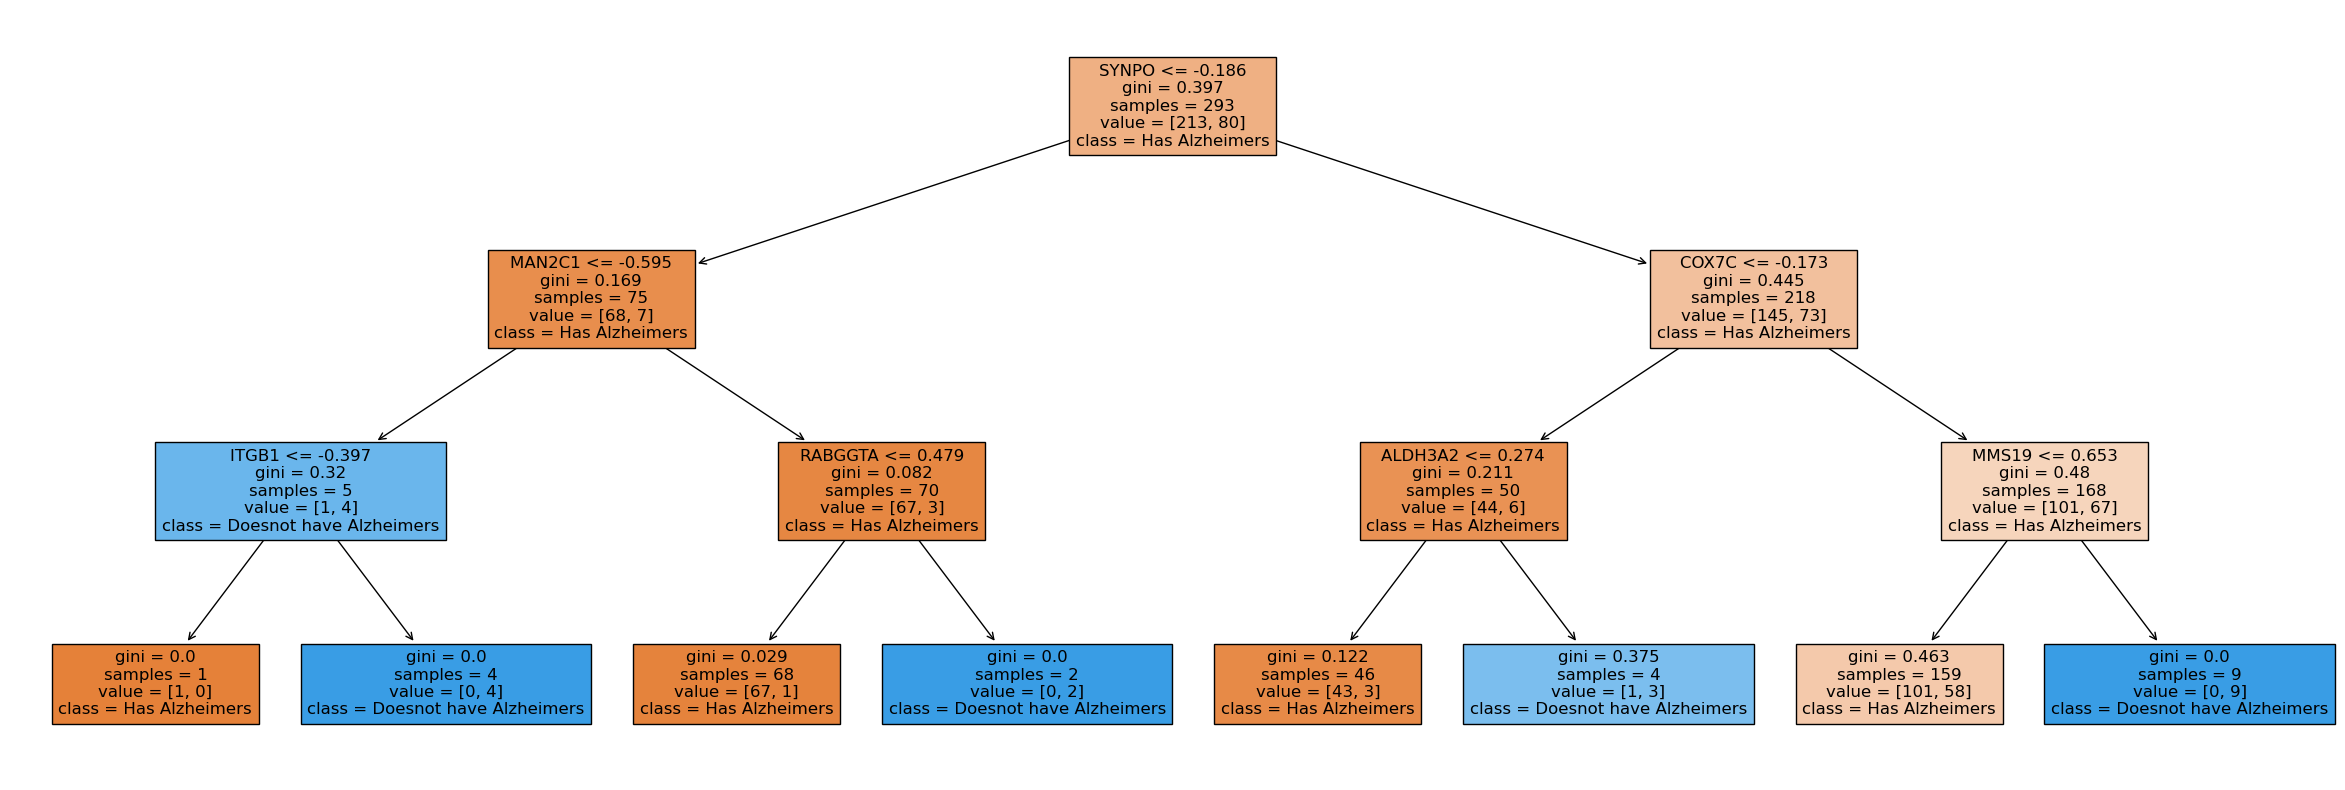

In [128]:
# Visualize the Decision Tree
plt.figure(figsize=(30, 10))
plot_tree(d_tree, filled=True, feature_names= filtered_protein_df.columns, class_names=['Has Alzheimers', 'Doesnot have Alzheimers'])
plt.show()

# Model 4 : SVM

In [129]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score, mean_squared_error, mean_absolute_error, r2_score

# Train a SVM model
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)


SVC(random_state=42)

In [130]:
# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

# Calculate metrics
mse_svm = mean_squared_error(y_test, y_pred_svm)
mae_svm = mean_absolute_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)

# Print the metrics
print('SVM Mean Square Error:', mse_svm)
print('SVM Mean Absolute Error:', mae_svm)
print('SVM R_squared:', r2_svm)


SVM Mean Square Error: 0.3253968253968254
SVM Mean Absolute Error: 0.3253968253968254
SVM R_squared: -0.4823529411764702


In [131]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

print('SVM Accuracy:', accuracy_svm)
print('SVM Recall:', recall_svm)
print('SVM Precision:', precision_svm)
print('SVM F1 Score:', f1_svm)

SVM Accuracy: 0.6746031746031746
SVM Recall: 0.0
SVM Precision: 0.0
SVM F1 Score: 0.0


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [132]:
# Print the Classification Report
print('SVM Classification Report:\n', classification_report(y_test, y_pred_svm))

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.67      1.00      0.81        85
           1       0.00      0.00      0.00        41

    accuracy                           0.67       126
   macro avg       0.34      0.50      0.40       126
weighted avg       0.46      0.67      0.54       126



/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [134]:
model_comparison = pd.DataFrame({
    'Model': ['Random Forest', 'Decision Tree', 'SVM'],
    'MSE': [mse, mse_tree, mse_svm],
    'MAE': [mae, mae_tree, mae_svm],
    'R_squared': [r2, r2_tree, r2_svm],
    'Accuracy': [accuracy, accuracy_tree, accuracy_svm],
    'Recall': [recall, recall_tree, recall_svm],
    'Precision': [precision, precision_tree, precision_svm],
    'F1 Score': [f1, f1_tree, f1_svm]
})

print(model_comparison)

           Model       MSE       MAE  R_squared  Accuracy    Recall  \
0  Random Forest  0.325397  0.325397  -0.482353  0.650794  0.097561   
1  Decision Tree  0.349206  0.349206  -0.590818  0.650794  0.097561   
2            SVM  0.325397  0.325397  -0.482353  0.674603  0.000000   

   Precision  F1 Score  
0   0.363636  0.153846  
1   0.363636  0.153846  
2   0.000000  0.000000  


# Data Analysis and Visualization

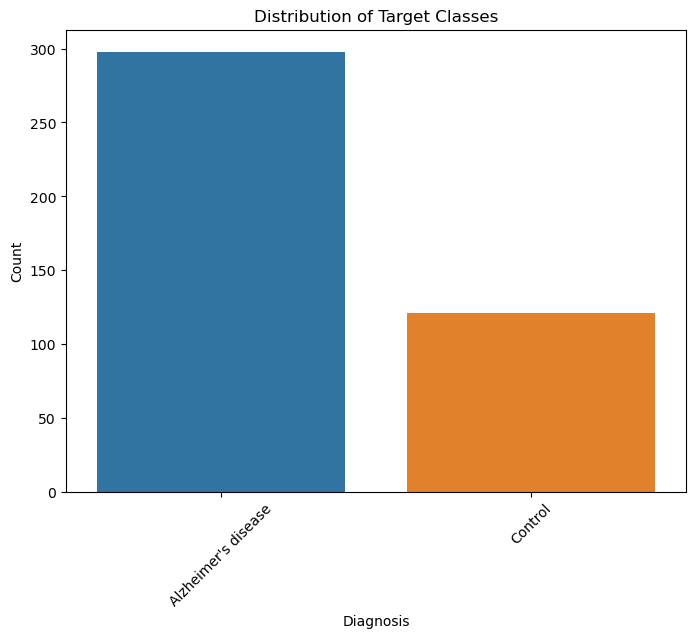

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of target classes
plt.figure(figsize=(8, 6))
sns.countplot(x=target_variable)
plt.title('Distribution of Target Classes')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.xticks(ticks=range(len(label_encoder.classes_)), labels=label_encoder.classes_, rotation=45)
plt.show()


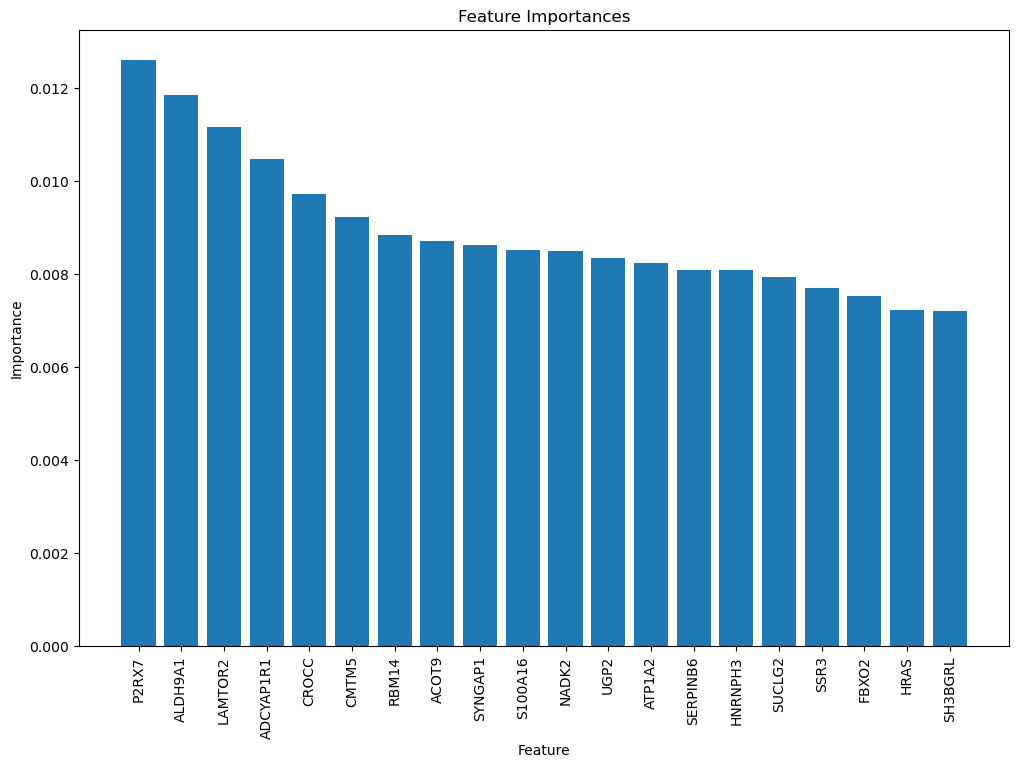

In [136]:
import numpy as np
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the top 20 features
plt.figure(figsize=(12, 8))
plt.title('Feature Importances')
plt.bar(range(20), importances[indices[:20]], align='center')
plt.xticks(range(20), filtered_protein_df.columns[indices[:20]], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()


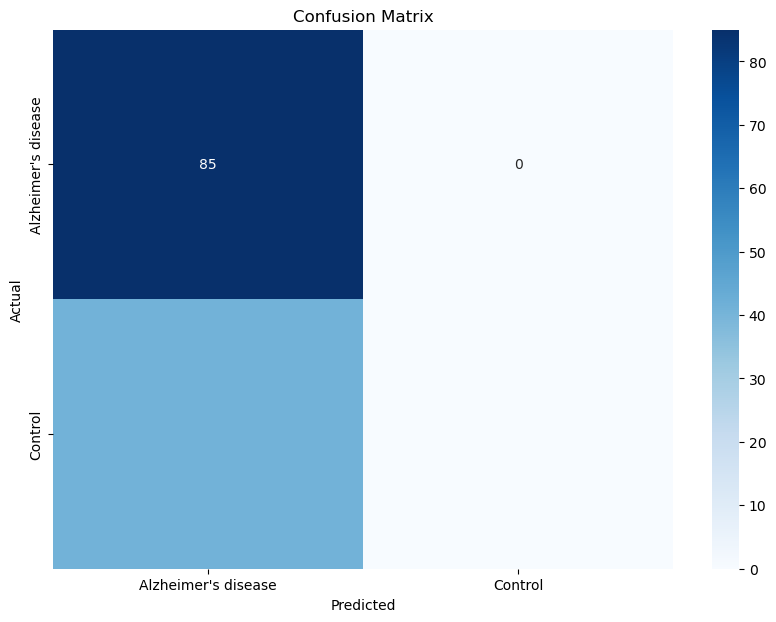

In [137]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [138]:
# Print the confusion matrix for reference
print('Confusion Matrix:')
print(cm)

Confusion Matrix:
[[85  0]
 [41  0]]


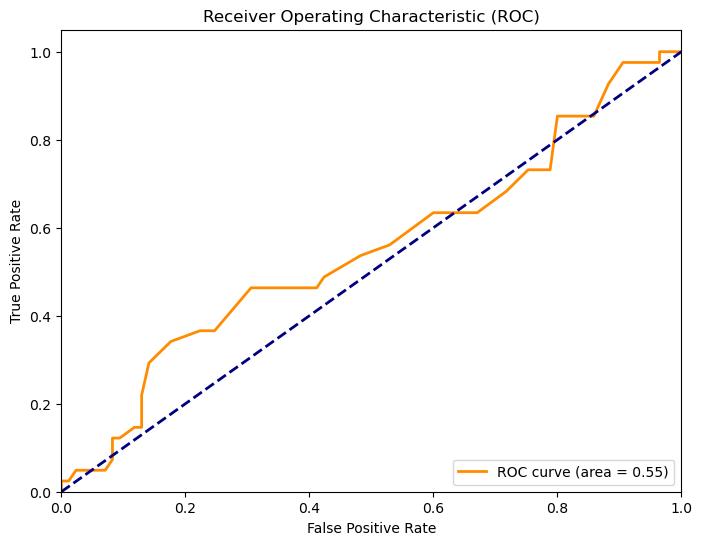

In [139]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1], pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


In [140]:
# Ensure you create a copy of the DataFrame slice before modifying it
subset_features = filtered_protein_df.iloc[:, :5].copy()
subset_features['Diagnosis'] = target_variable

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

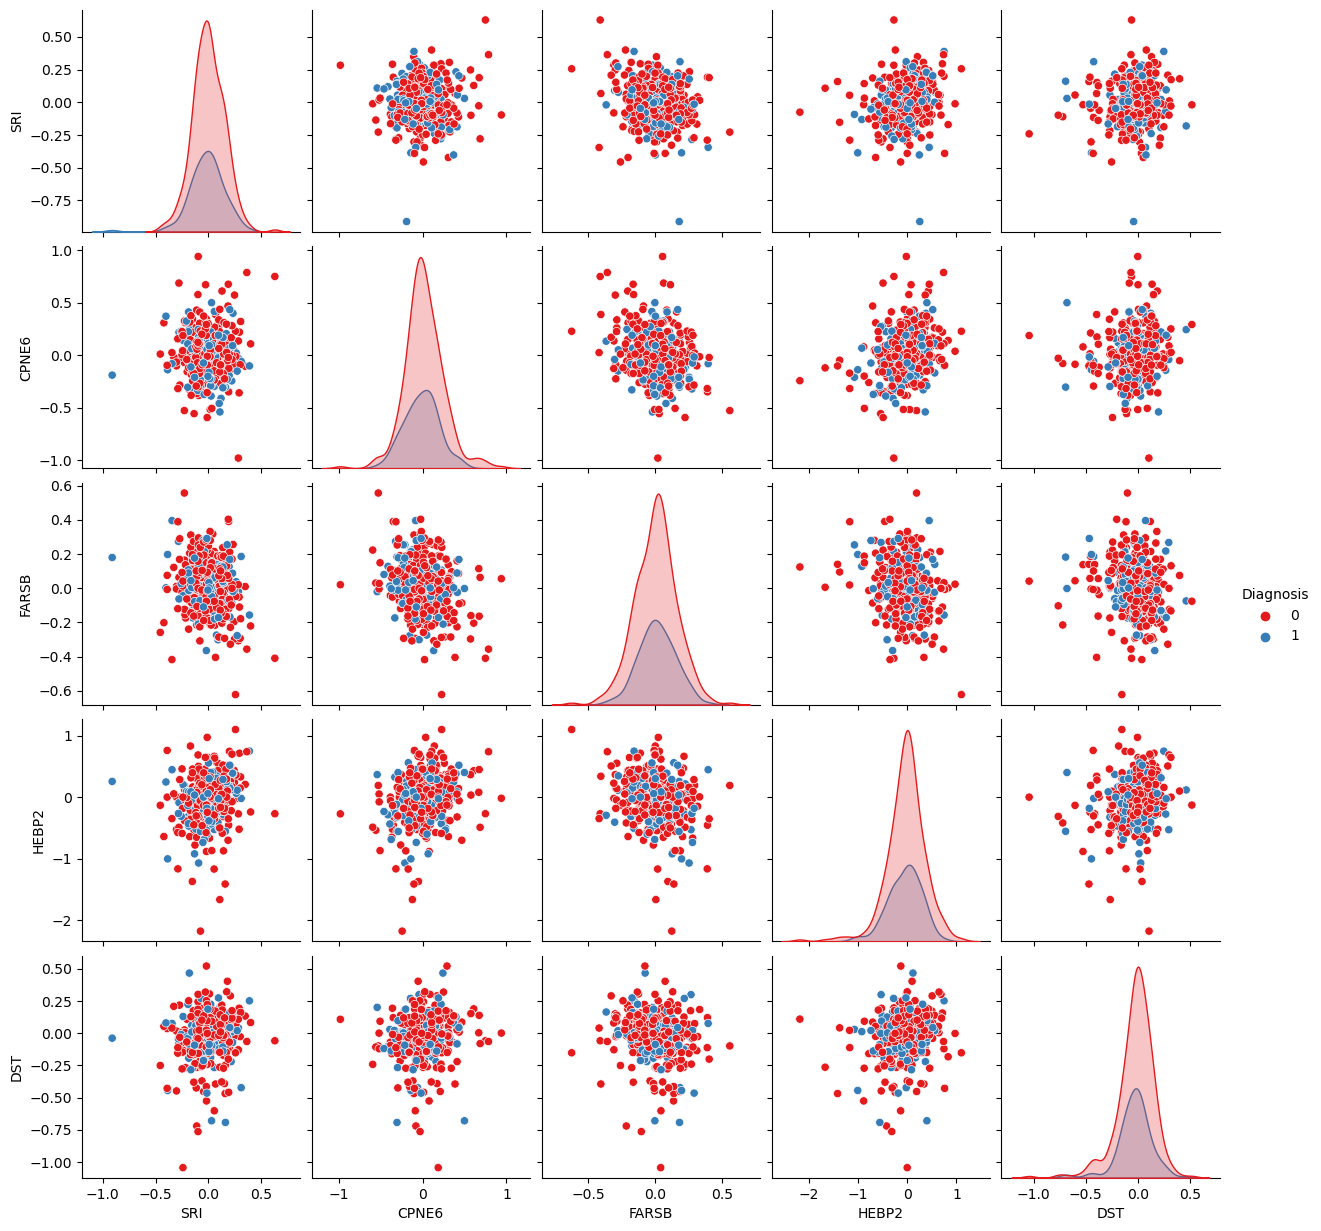

In [141]:
import numpy as np

# Convert inf values to NaN in the DataFrame
filtered_protein_df.replace([np.inf, -np.inf], np.nan, inplace=True)
subset_features = filtered_protein_df.iloc[:, :5].copy()
subset_features['Diagnosis'] = target_variable

# Plot using Seaborn
sns.pairplot(subset_features, hue='Diagnosis', palette='Set1')
plt.show()

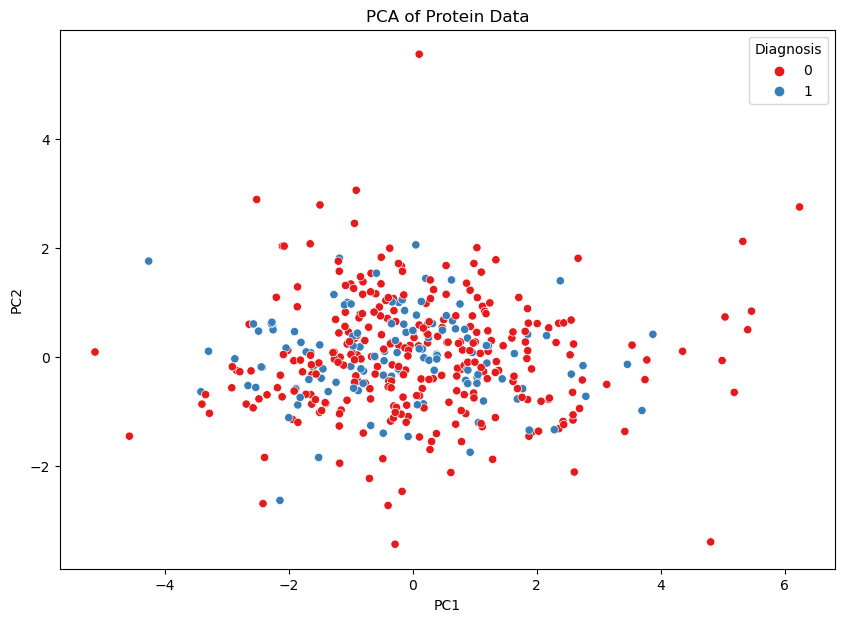

In [142]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=2)  # Use 2 components for 2D visualization
principal_components = pca.fit_transform(filtered_protein_df)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Diagnosis'] = target_variable

# Plot the PCA results
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='Diagnosis', data=pca_df, palette='Set1')
plt.title('PCA of Protein Data')
plt.show()


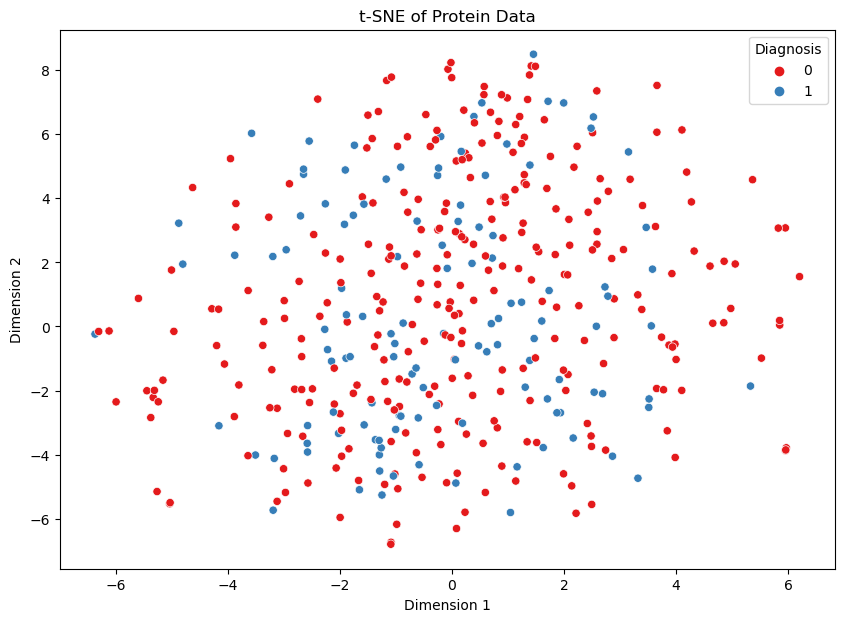

In [143]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(filtered_protein_df)

# Create a DataFrame for the t-SNE results
tsne_df = pd.DataFrame(data=tsne_results, columns=['Dimension 1', 'Dimension 2'])
tsne_df['Diagnosis'] = target_variable

# Plot the t-SNE results
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='Diagnosis', data=tsne_df, palette='Set1')
plt.title('t-SNE of Protein Data')
plt.show()


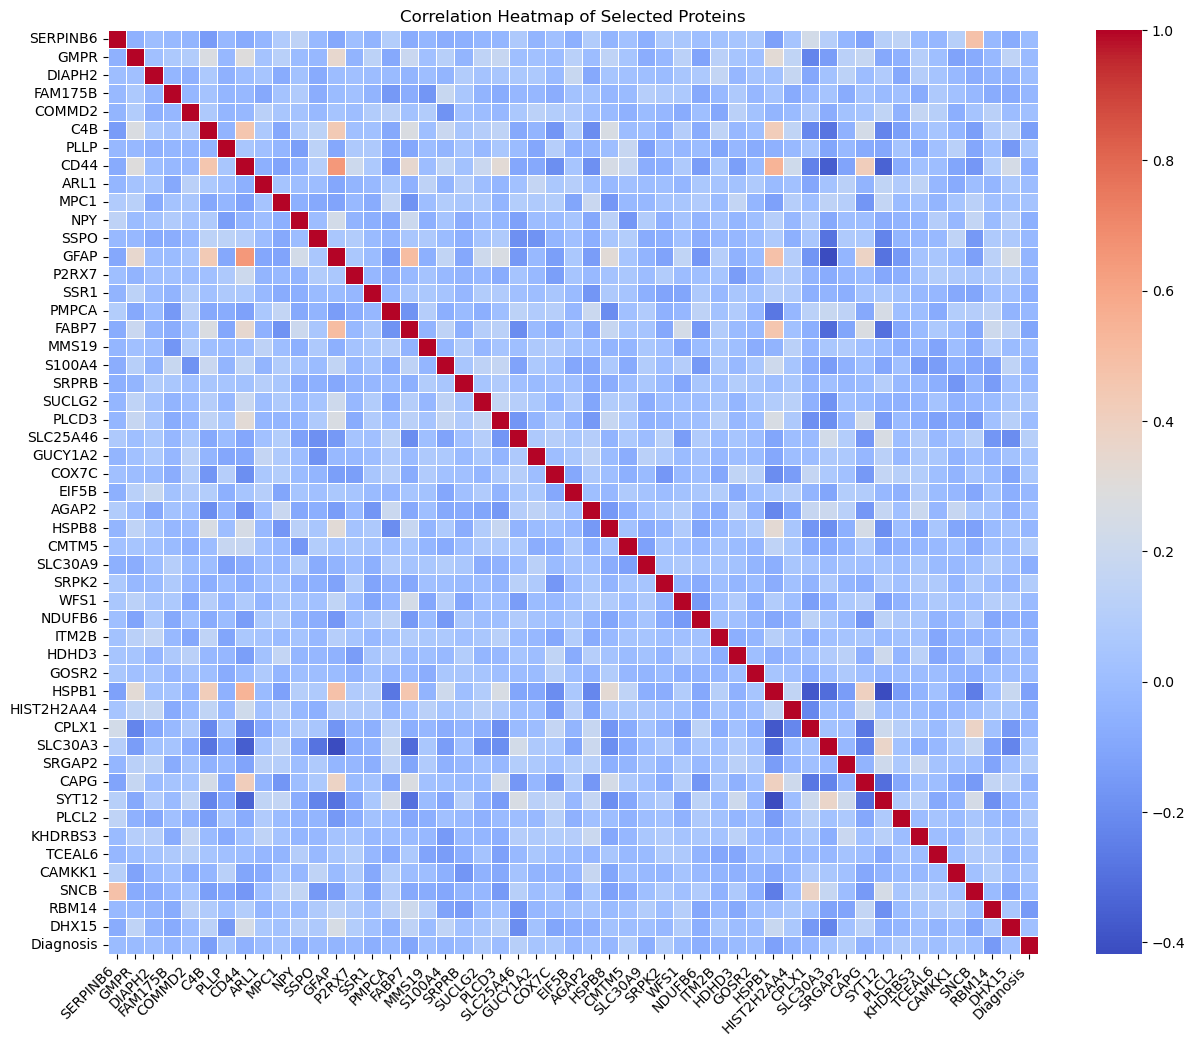

In [145]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(subset_df.drop('Diagnosis', axis=1))

# Create a DataFrame for the heatmap
heatmap_df = pd.DataFrame(scaled_data, columns=subset_df.columns[:-1])
heatmap_df['Diagnosis'] = subset_df['Diagnosis'].values

# Plot the heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(heatmap_df.corr(), cmap='coolwarm', annot=False, fmt='.1f', linewidths=0.5)
plt.title('Correlation Heatmap of Selected Proteins')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()


### heatmap displaying only the correlations that are 0.4 or higher in absolute value.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


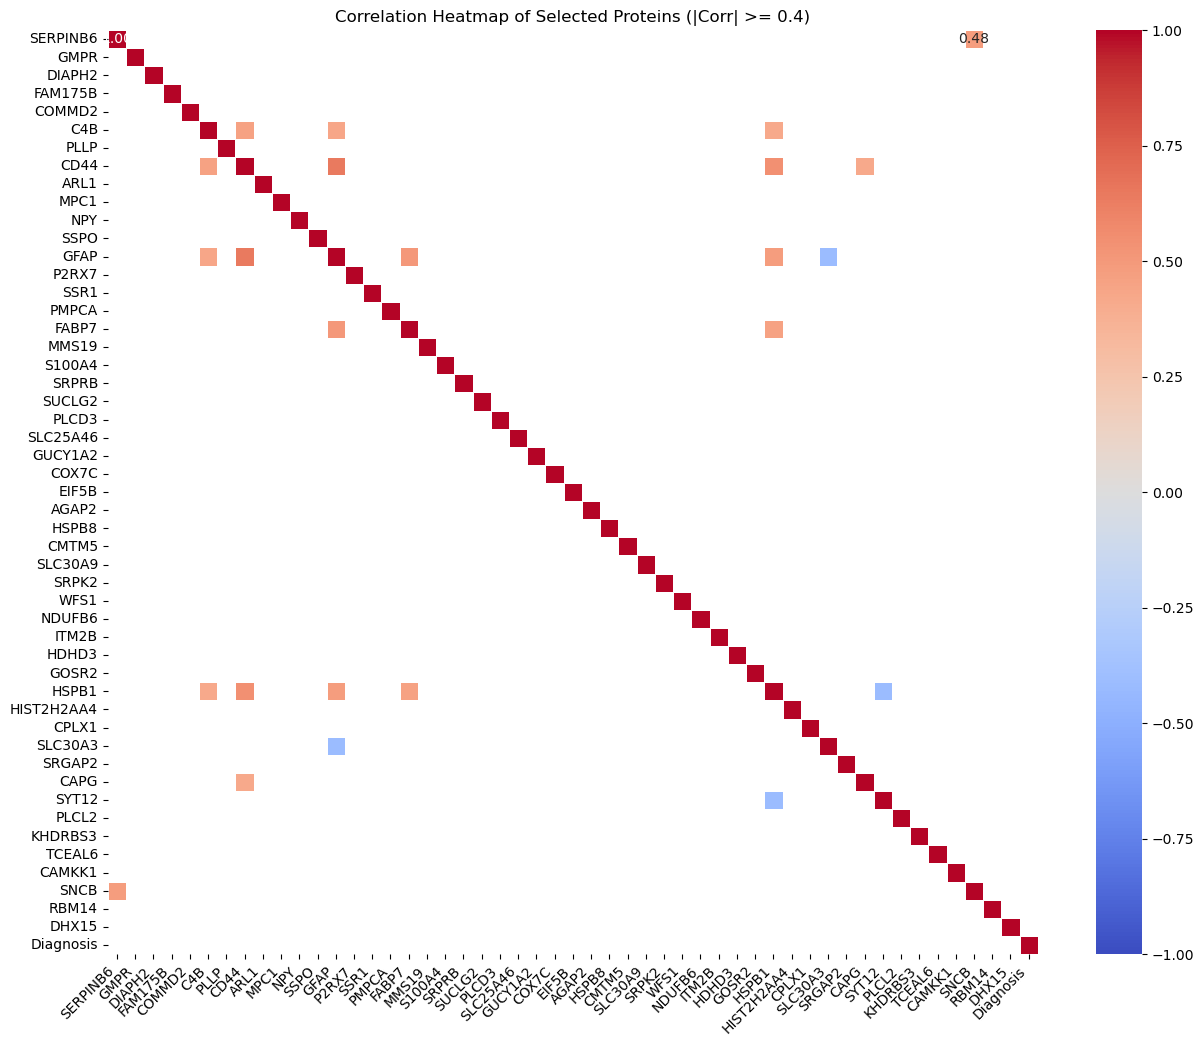

In [151]:
# Compute the correlation matrix
corr_matrix = heatmap_df.corr()

# Create a mask for 0.4 and higher
mask = np.abs(corr_matrix) < 0.4

# Mask the correlation matrix
masked_corr_matrix = corr_matrix.copy()
masked_corr_matrix[mask] = np.nan

# Plot the masked correlation matrix
plt.figure(figsize=(15, 12))
sns.heatmap(masked_corr_matrix, cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5, vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Selected Proteins (|Corr| >= 0.4)')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

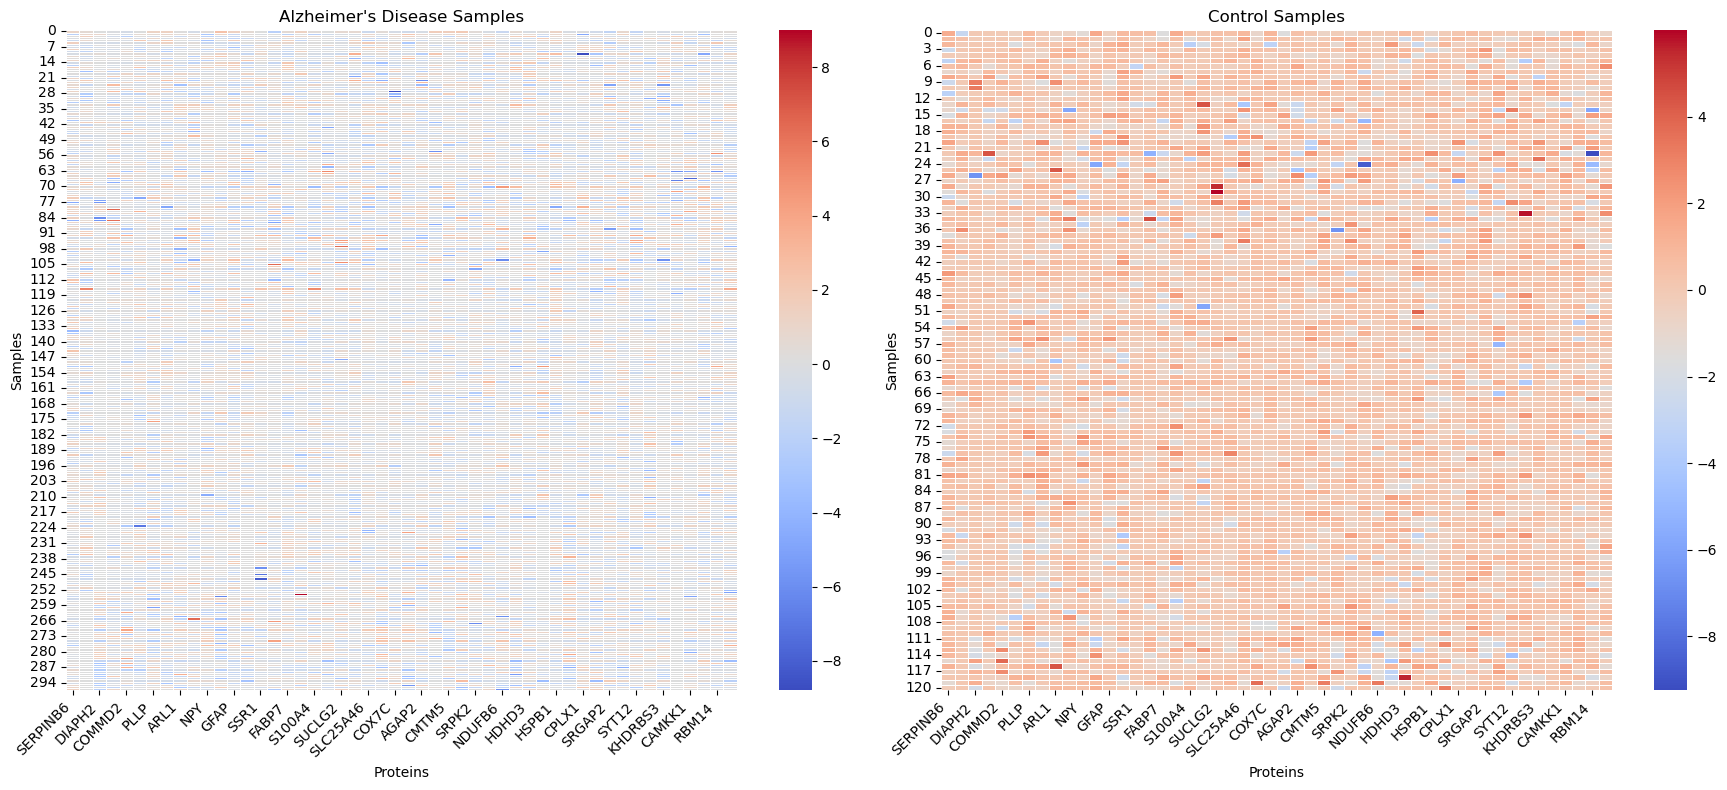

In [152]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Filter data for Alzheimer's disease (0) and control (1)
alzheimers_df = subset_df[subset_df['Diagnosis'] == 0].drop('Diagnosis', axis=1)
control_df = subset_df[subset_df['Diagnosis'] == 1].drop('Diagnosis', axis=1)

# Standardize the data for each group
scaler = StandardScaler()
alzheimers_scaled = scaler.fit_transform(alzheimers_df)
control_scaled = scaler.transform(control_df)

# Create DataFrames for heatmaps
alzheimers_heatmap_df = pd.DataFrame(alzheimers_scaled, columns=alzheimers_df.columns)
control_heatmap_df = pd.DataFrame(control_scaled, columns=control_df.columns)

# Plot heatmaps
plt.figure(figsize=(18, 8))

plt.subplot(1, 2, 1)
sns.heatmap(alzheimers_heatmap_df, cmap='coolwarm', annot=False, fmt='.1f', linewidths=0.5)
plt.title('Alzheimer\'s Disease Samples')
plt.xlabel('Proteins')
plt.ylabel('Samples')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 2, 2)
sns.heatmap(control_heatmap_df, cmap='coolwarm', annot=False, fmt='.1f', linewidths=0.5)
plt.title('Control Samples')
plt.xlabel('Proteins')
plt.ylabel('Samples')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


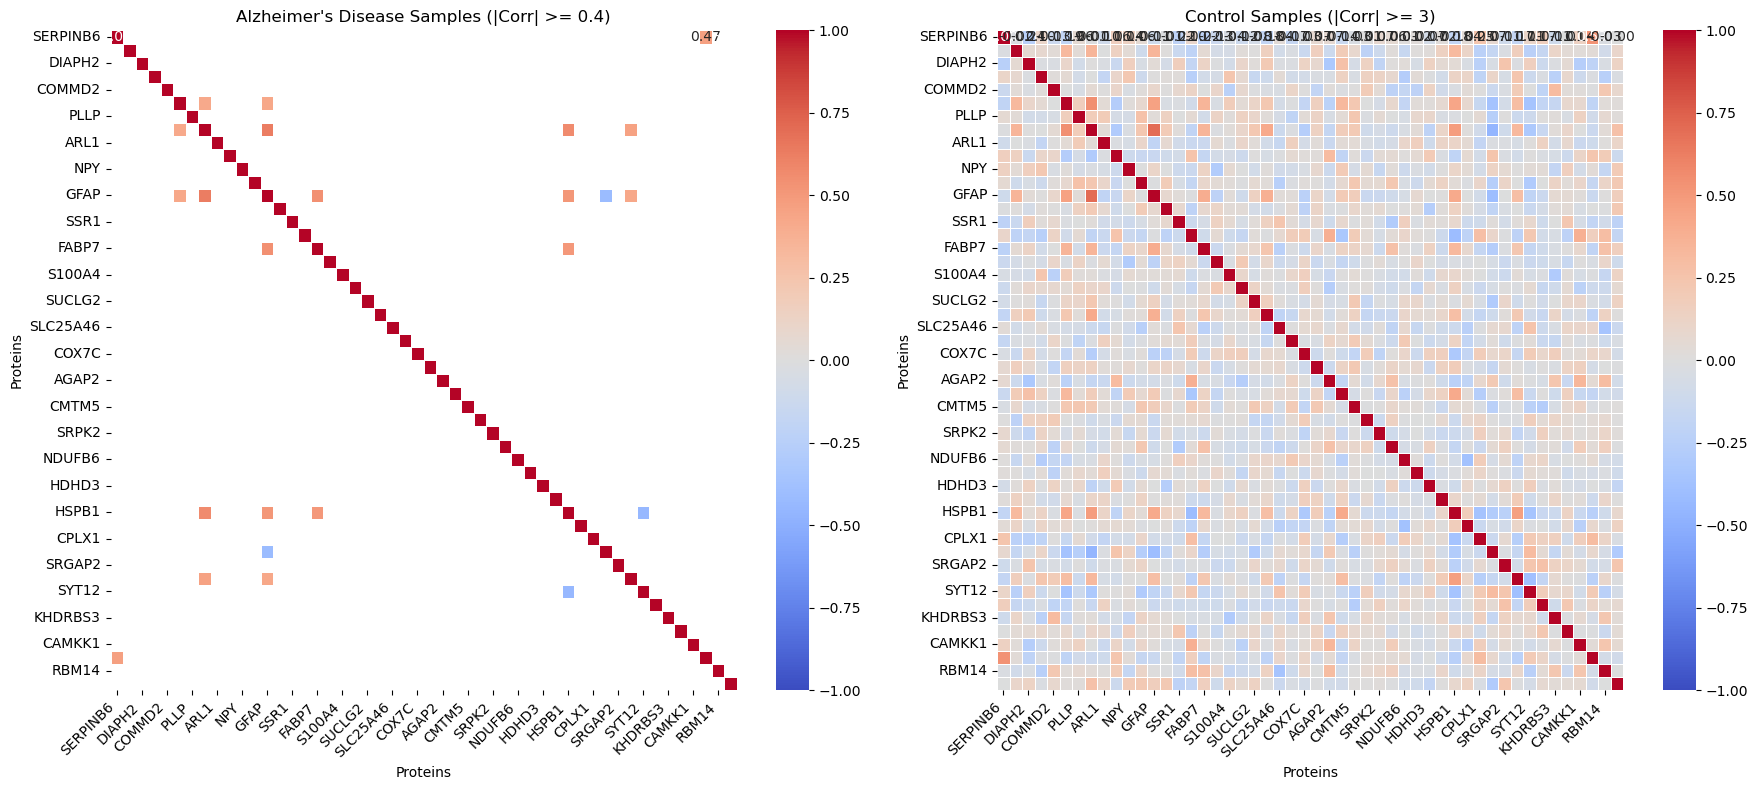

In [161]:
# Compute the correlation matrices
alzheimers_corr_matrix = alzheimers_heatmap_df.corr()
control_corr_matrix = control_heatmap_df.corr()

# Create masks for correlations below the thresholds
alzheimers_mask = np.abs(alzheimers_corr_matrix) < 0.4
#control_mask = np.abs(control_corr_matrix) < 0
ontrol_mask = np.abs(control_corr_matrix) < 3

# Apply the masks
alzheimers_masked_corr_matrix = alzheimers_corr_matrix.copy()
alzheimers_masked_corr_matrix[alzheimers_mask] = np.nan

control_masked_corr_matrix = control_corr_matrix.copy()
control_masked_corr_matrix[control_mask] = np.nan

# Plot the heatmaps
plt.figure(figsize=(18, 8))

# Plot Alzheimer's Disease Samples heatmap
plt.subplot(1, 2, 1)
sns.heatmap(alzheimers_masked_corr_matrix, cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5, vmin=-1, vmax=1, center=0)
plt.title('Alzheimer\'s Disease Samples (|Corr| >= 0.4)')
plt.xlabel('Proteins')
plt.ylabel('Proteins')
plt.xticks(rotation=45, ha='right')

# Plot Control Samples heatmap
plt.subplot(1, 2, 2)
sns.heatmap(control_masked_corr_matrix, cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5, vmin=-1, vmax=1, center=0)
#plt.title('Control Samples (|Corr| >= 0)')
plt.title('Control Samples (|Corr| >= 3)')
plt.xlabel('Proteins')
plt.ylabel('Proteins')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Identification of Age-Specific Hallmarks

In [162]:
# Define the categorization function
def categorize_age(age):
    if age < 50:
        return 'young'
    elif 50 <= age < 70:
        return 'middle_age'
    else:
        return 'old'

# Apply the function to create a new column for age groups
metadata_df_transposed['AgeGroup'] = metadata_df_transposed['Age'].astype(int).apply(categorize_age)

# Print the updated DataFrame to check the new column
print(metadata_df_transposed.head())


Sample      Sample   Age     Sex            Diagnosis                 Tissue  \
0       GSM3577568  93.0  Female  Alzheimer's disease  Brain; fusiform gyrus   
1       GSM3577569  77.0    Male  Alzheimer's disease  Brain; fusiform gyrus   
2       GSM3577570  92.0    Male  Alzheimer's disease  Brain; fusiform gyrus   
3       GSM3577571  85.0    Male  Alzheimer's disease  Brain; fusiform gyrus   
4       GSM3577572  83.0    Male  Alzheimer's disease  Brain; fusiform gyrus   

Sample Batch N_multimapping N_noFeature N_ambiguous DDX11L1  ... DAZ3 DAZ2  \
0          1        4277036     8048774      127177       4  ...    0    0   
1          1        3816507     7974872      124874       0  ...    0    0   
2          1        3880224     8323017      111939       0  ...    0    0   
3          1        4380642     9230817      114212       1  ...    0    0   
4          1        3720851     8155090      124790       0  ...    0    0   

Sample TTTY3B TTTY3 CDY1B CDY1 CSPG4P1Y GOLGA2P3Y 

In [167]:
# Load data
young_proteins_df = pd.read_csv('Young_proteins.csv')
young_proteins_df.head(4)

,Young Proteins
0,MAPT
1,AAK1
2,RPL37A
3,TIMM44


In [168]:
middle_age_proteins_df = pd.read_csv('Middle_proteins.csv')
middle_age_proteins_df.head(4)

,Middle Proteins
0,VGF
1,LTA4H
2,APP
3,C4B


In [169]:
old_proteins_df = pd.read_csv('Old_proteins.csv')
old_proteins_df.head(4)

,Old Proteins
0,APP
1,ACAT2
2,LRP1
3,DDX17


In [172]:
# Find missing proteins in each list
def find_missing_proteins(df, protein_list):
    missing_proteins = [protein for protein in protein_list if protein not in df.columns]
    return missing_proteins

# Check missing proteins
missing_young = find_missing_proteins(metadata_df_transposed, normalized_young_proteins)
missing_middle_age = find_missing_proteins(metadata_df_transposed, normalized_middle_age_proteins)
missing_old = find_missing_proteins(metadata_df_transposed, normalized_old_proteins)

print("Missing proteins in young dataset:", missing_young)
print("Missing proteins in middle_age dataset:", missing_middle_age)
print("Missing proteins in old dataset:", missing_old)


Missing proteins in young dataset: []
Missing proteins in middle_age dataset: ['KIAA1045']
Missing proteins in old dataset: ['C12ORF5']


In [173]:
# Update protein lists to only include proteins present in the DataFrame
def filter_existing_proteins(df, protein_list):
    return [protein for protein in protein_list if protein in df.columns]

# Filter proteins for each age group
normalized_young_proteins = filter_existing_proteins(metadata_df_transposed, normalized_young_proteins)
normalized_middle_age_proteins = filter_existing_proteins(metadata_df_transposed, normalized_middle_age_proteins)
normalized_old_proteins = filter_existing_proteins(metadata_df_transposed, normalized_old_proteins)


In [174]:
# Filter for proteins in each age group
young_df_filtered = filter_proteins(young_df, normalized_young_proteins)
middle_age_df_filtered = filter_proteins(middle_age_df, normalized_middle_age_proteins)
old_df_filtered = filter_proteins(old_df, normalized_old_proteins)

print(young_df_filtered.head())
print(middle_age_df_filtered.head())
print(old_df_filtered.head())


Sample  AAK1 RPL37A TIMM44 SERINC1 ALDH3A2 SSPO SNCB AGAP2 CPLX1 HSPA12A  ...  \
420     2010     14      4      75      92    0   44   425     2     260  ...   
489      814     16      1      71       4    4    1     2     9       7  ...   
492     1137    156     13      83      40   94    3    35     2      23  ...   

Sample SACM1L DPYSL3 PLEC PDK3 GSK3A PSMA6 PFDN5 SYNPO PPP2R5D AgeGroup  
420        25     68   71   98    43     4    36    47      20    young  
489         2     28   72   72    17     2    18    37      36    young  
492        51     31  360  205    51    14    85    30      60    young  

[3 rows x 99 columns]
Sample  VGF LTA4H    APP C4B NDRG3 RPL9  TPM3   NNT SEC22B SMC1A  ... ASNA1  \
18      110   753  24010   0  1954  114  1589   656    227  1743  ...   910   
41      339   480  10271   0  1766  726  1802   660    125   874  ...   757   
91      513   827  28085   0  3350  474  2500  1271    266  1031  ...  1320   
129      83   656  18265   0  1661   62 

In [183]:
def filter_proteins_safe(df, protein_list):
    # Check which proteins are actually in the DataFrame
    valid_proteins = [protein for protein in protein_list if protein in df.columns]
    return df[valid_proteins + ['AgeGroup']].dropna()

# Apply the safe filtering
young_df_filtered = filter_proteins_safe(young_df, normalized_young_proteins)
middle_age_df_filtered = filter_proteins_safe(middle_age_df, normalized_middle_age_proteins)
old_df_filtered = filter_proteins_safe(old_df, normalized_old_proteins)

# Check the filtered DataFrames
print(young_df_filtered.columns)
print(middle_age_df_filtered.columns)
print(old_df_filtered.columns)


Index(['AAK1', 'RPL37A', 'TIMM44', 'SERINC1', 'ALDH3A2', 'SSPO', 'SNCB',
       'AGAP2', 'CPLX1', 'HSPA12A', 'INA', 'SSR1', 'SRGAP2', 'ALDH9A1',
       'STXBP5L', 'FARSB', 'NDUFA5', 'VGF', 'NDUFS8', 'TLN1', 'DDAH2',
       'SEC31A', 'SLC25A25', 'PMPCA', 'TOM1L2', 'AGRN', 'AARS', 'NDUFA9',
       'ABR', 'CYCS', 'SYNGAP1', 'SLC25A46', 'SMC1A', 'SH3BGRL', 'HIST2H2AA4',
       'LETM1', 'ENO2', 'RBM14', 'PBXIP1', 'COX7C', 'ESD', 'COX7A2L', 'FKBP1A',
       'ITSN1', 'NADK2', 'SUCLA2', 'WASL', 'VCP', 'NDUFS1', 'ADD3', 'PDCD5',
       'BAIAP2', 'ARRB1', 'BLVRB', 'CYC1', 'NUMBL', 'NONO', 'RPH3A', 'STRN',
       'MSN', 'ADCYAP1R1', 'SRPK2', 'ACAT2', 'NAPG', 'HSPA1B', 'PGLS', 'NPY',
       'LMNB2', 'SOGA3', 'HSPB8', 'FHL1', 'SPTBN4', 'NDUFB6', 'DUSP3', 'PPM1H',
       'XPO1', 'SFXN1', 'ATP2A2', 'GABRB3', 'SNAP25', 'CAPG', 'ABHD14B',
       'LMNA', 'EPS15L1', 'NDUFS2', 'LTA4H', 'NAGK', 'CYFIP1', 'PFDN2',
       'SACM1L', 'DPYSL3', 'PLEC', 'PDK3', 'GSK3A', 'PSMA6', 'PFDN5', 'SYNPO',
       'PPP2R5D

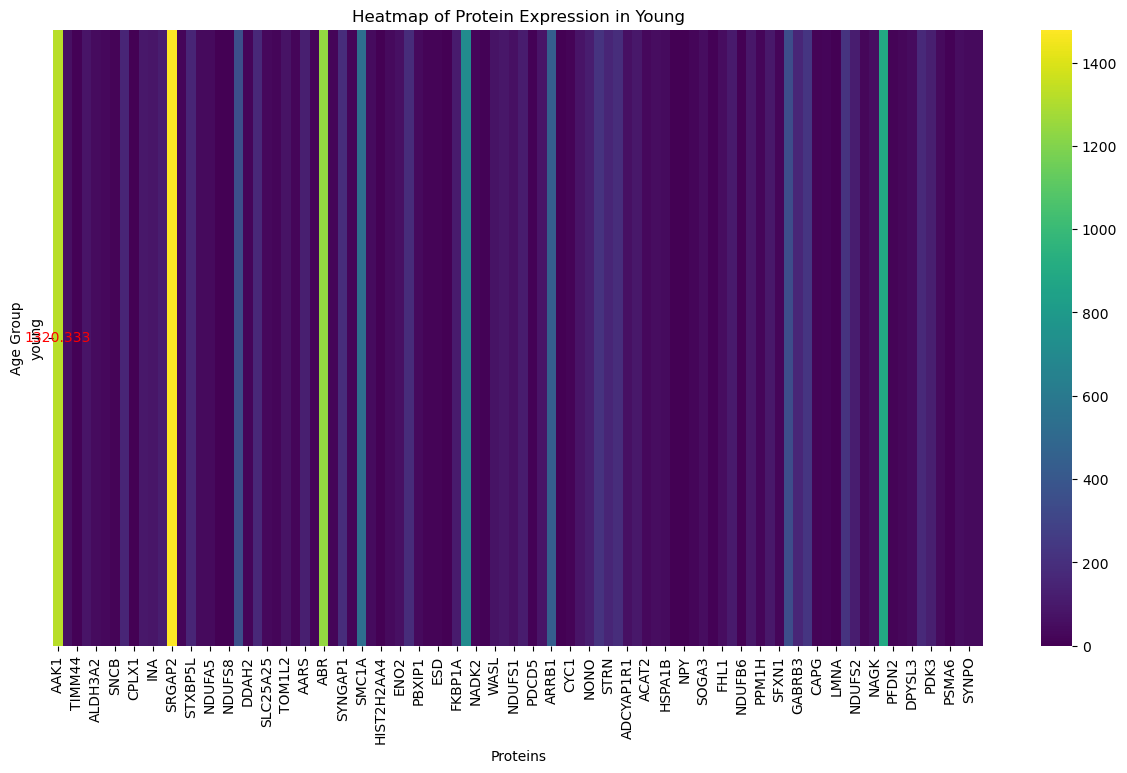

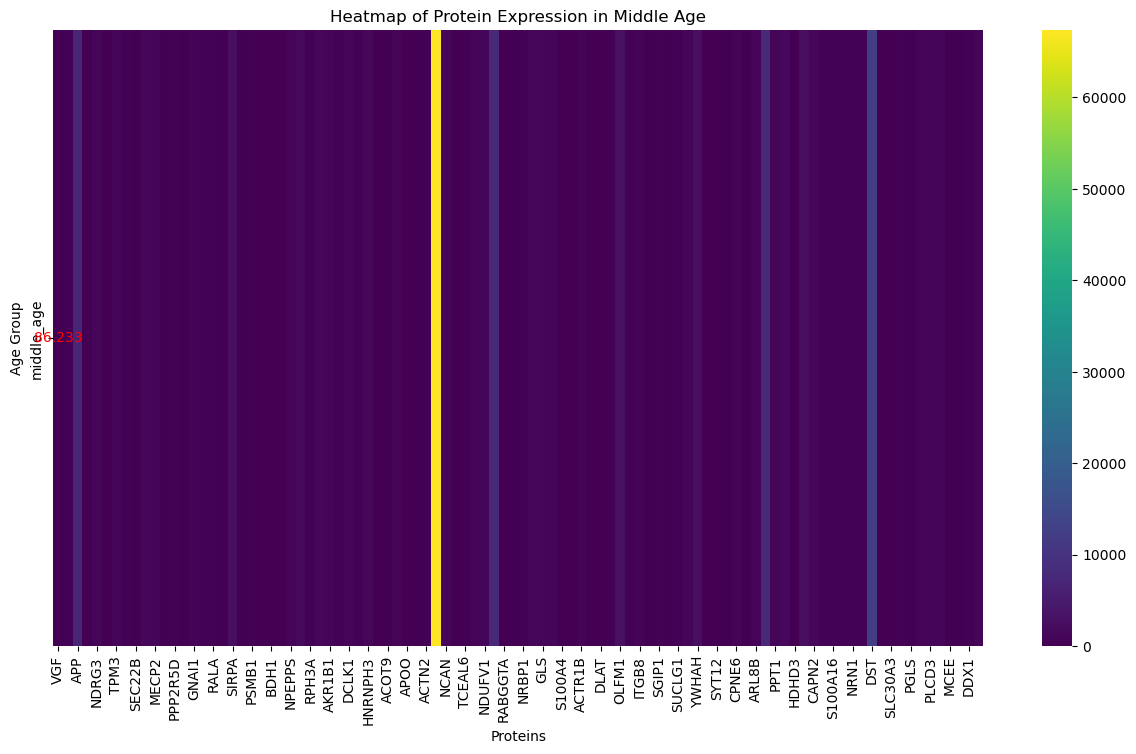

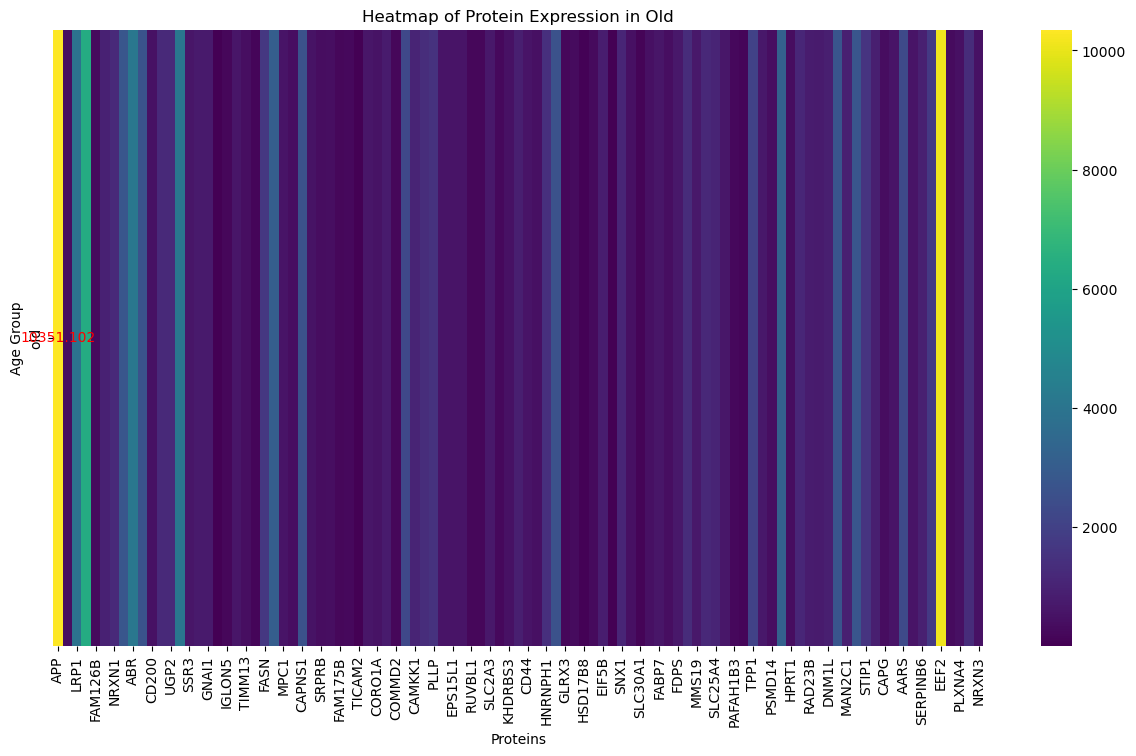

In [184]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def filter_proteins_safe(df, proteins):
    # Check which proteins are in the DataFrame
    available_proteins = [protein for protein in proteins if protein in df.columns]
    
    # Print missing proteins
    missing_proteins = [protein for protein in proteins if protein not in df.columns]
    if missing_proteins:
        print(f" ")
        #print(f"Missing proteins: {missing_proteins}")
        
    
    # Filter the DataFrame to keep only the columns that are in the available_proteins list
    return df[available_proteins].copy()

def plot_heatmap(df, proteins, age_group):
    df_filtered = filter_proteins_safe(df, proteins)
    
    # Ensure that all data is numeric
    df_filtered = df_filtered.apply(pd.to_numeric, errors='coerce')
    
    # Drop columns with all NaN values
    df_filtered = df_filtered.dropna(axis=1, how='all')
    
    # Check if there are any numeric columns left
    if df_filtered.shape[1] > 1:
        # Ensure that AgeGroup is numeric if it is part of the DataFrame
        if 'AgeGroup' in df_filtered.columns:
            df_filtered['AgeGroup'] = pd.Categorical(df_filtered['AgeGroup']).codes
        
        # Group by AgeGroup and calculate mean
        expression_data = df_filtered.groupby(df['AgeGroup']).mean()
        
        # Plot heatmap
        plt.figure(figsize=(15, 8))
        sns.heatmap(expression_data, cmap='viridis', annot=True, fmt=".3f", cbar=True, annot_kws={'color':'red'})
        plt.title(f'Heatmap of Protein Expression in {age_group}')
        plt.xlabel('Proteins')
        plt.ylabel('Age Group')
        plt.show()
    else:
        print(f"Not enough proteins available for heatmap in {age_group} dataset.")

# Example usage
# Assuming you have DataFrames and protein lists defined for each age group
plot_heatmap(young_df, normalized_young_proteins, 'Young')
plot_heatmap(middle_age_df, normalized_middle_age_proteins, 'Middle Age')
plot_heatmap(old_df, normalized_old_proteins, 'Old')


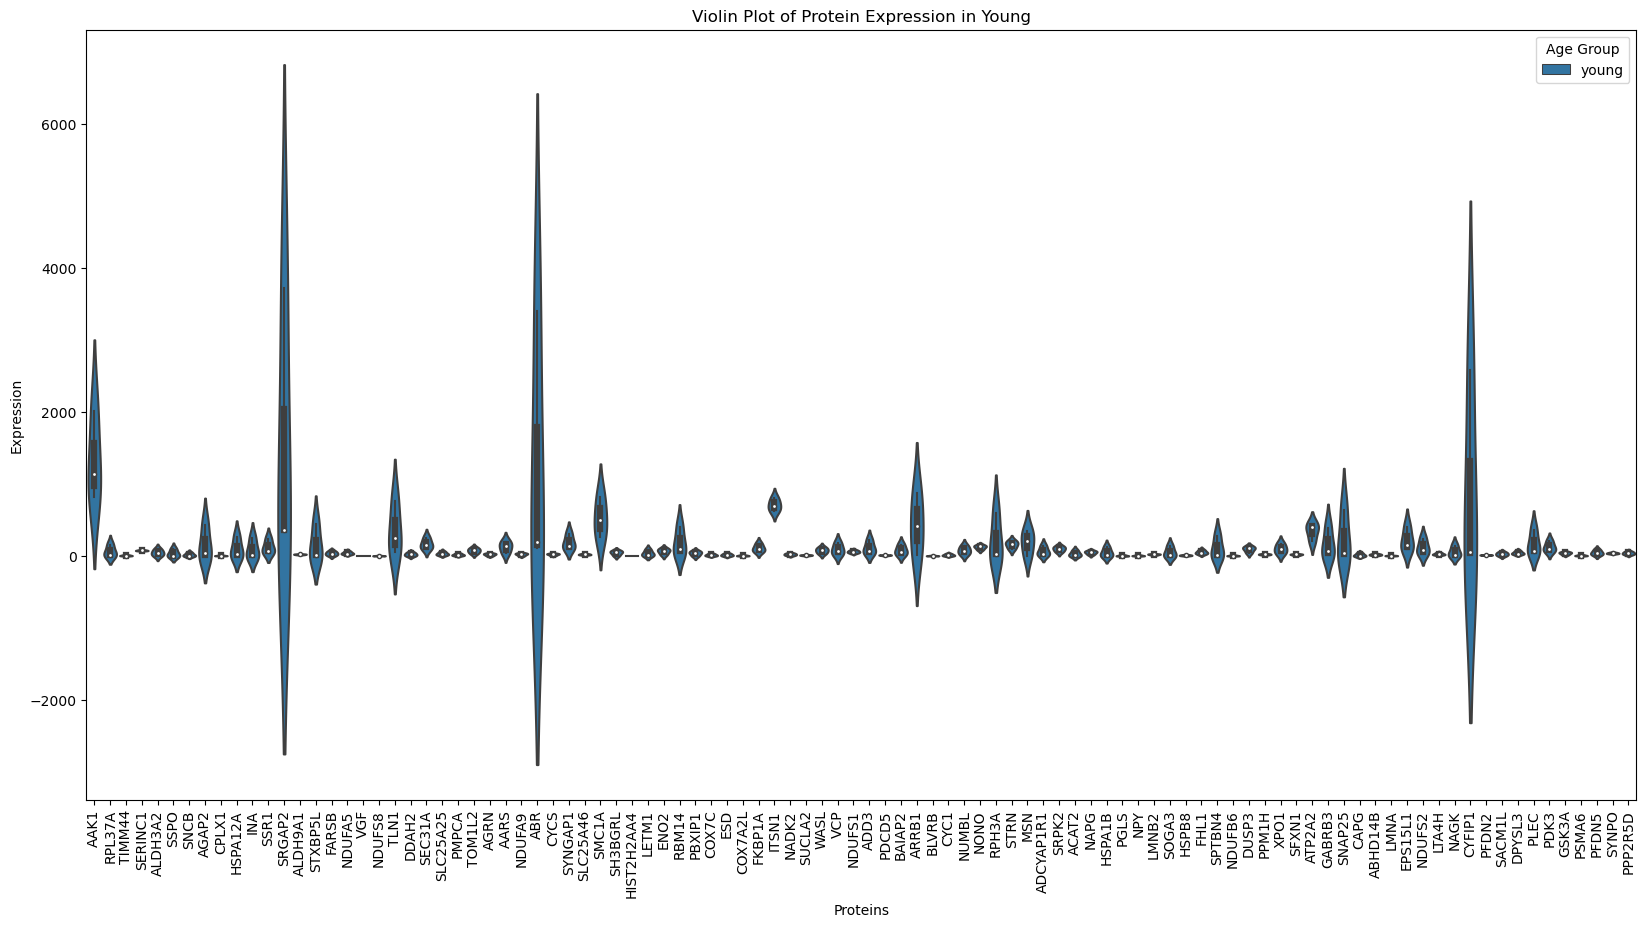

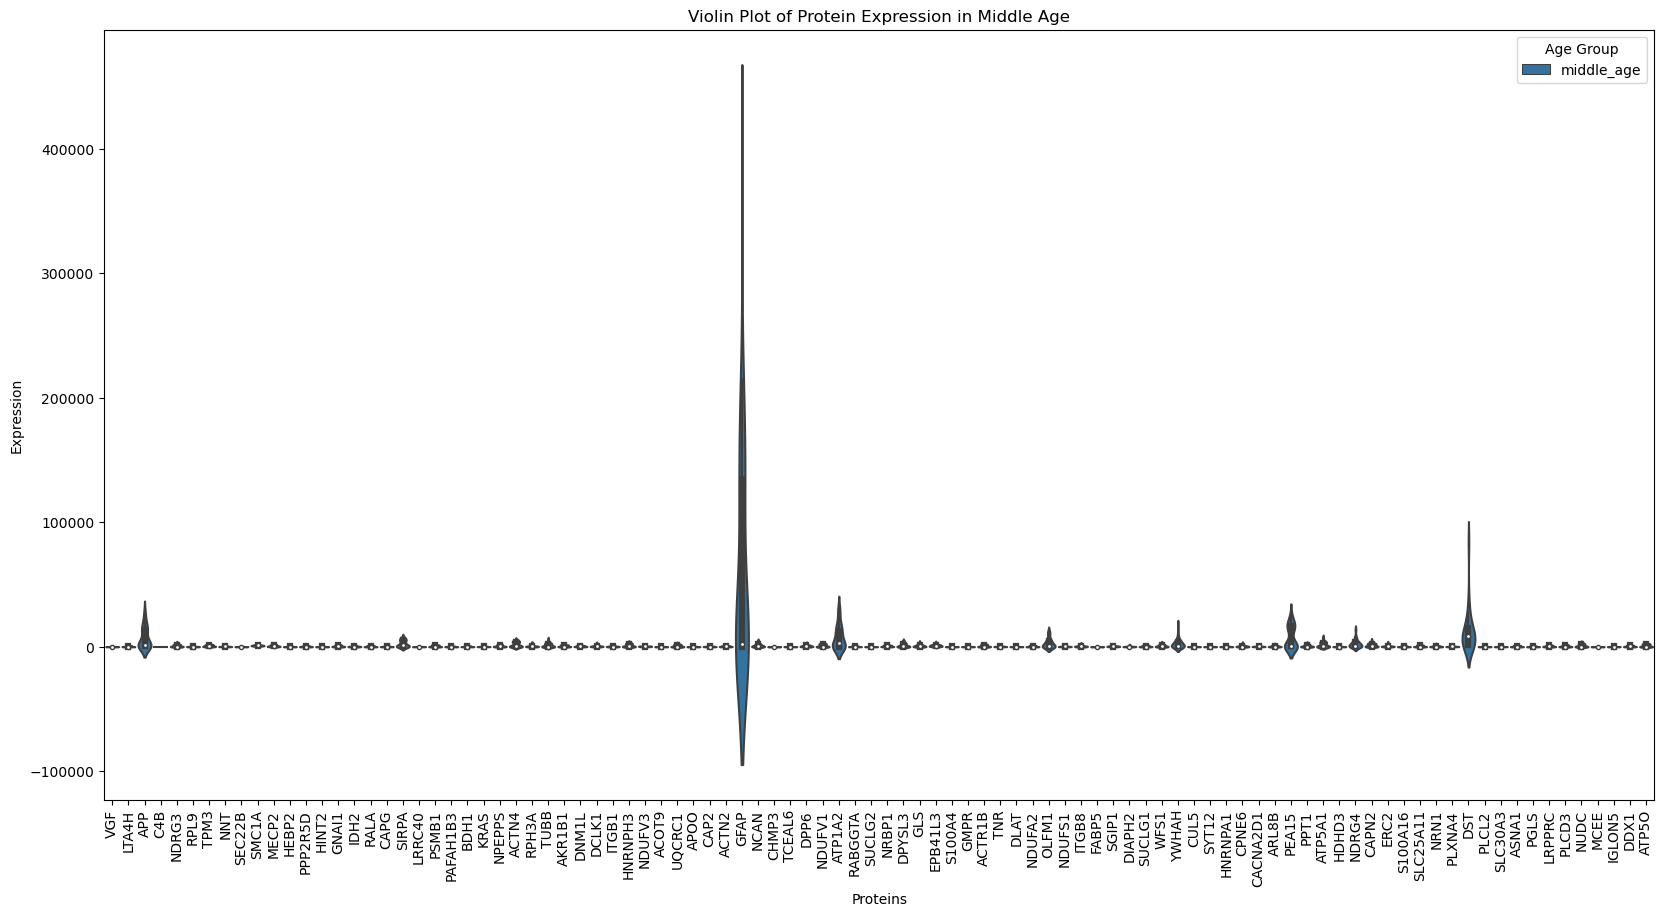

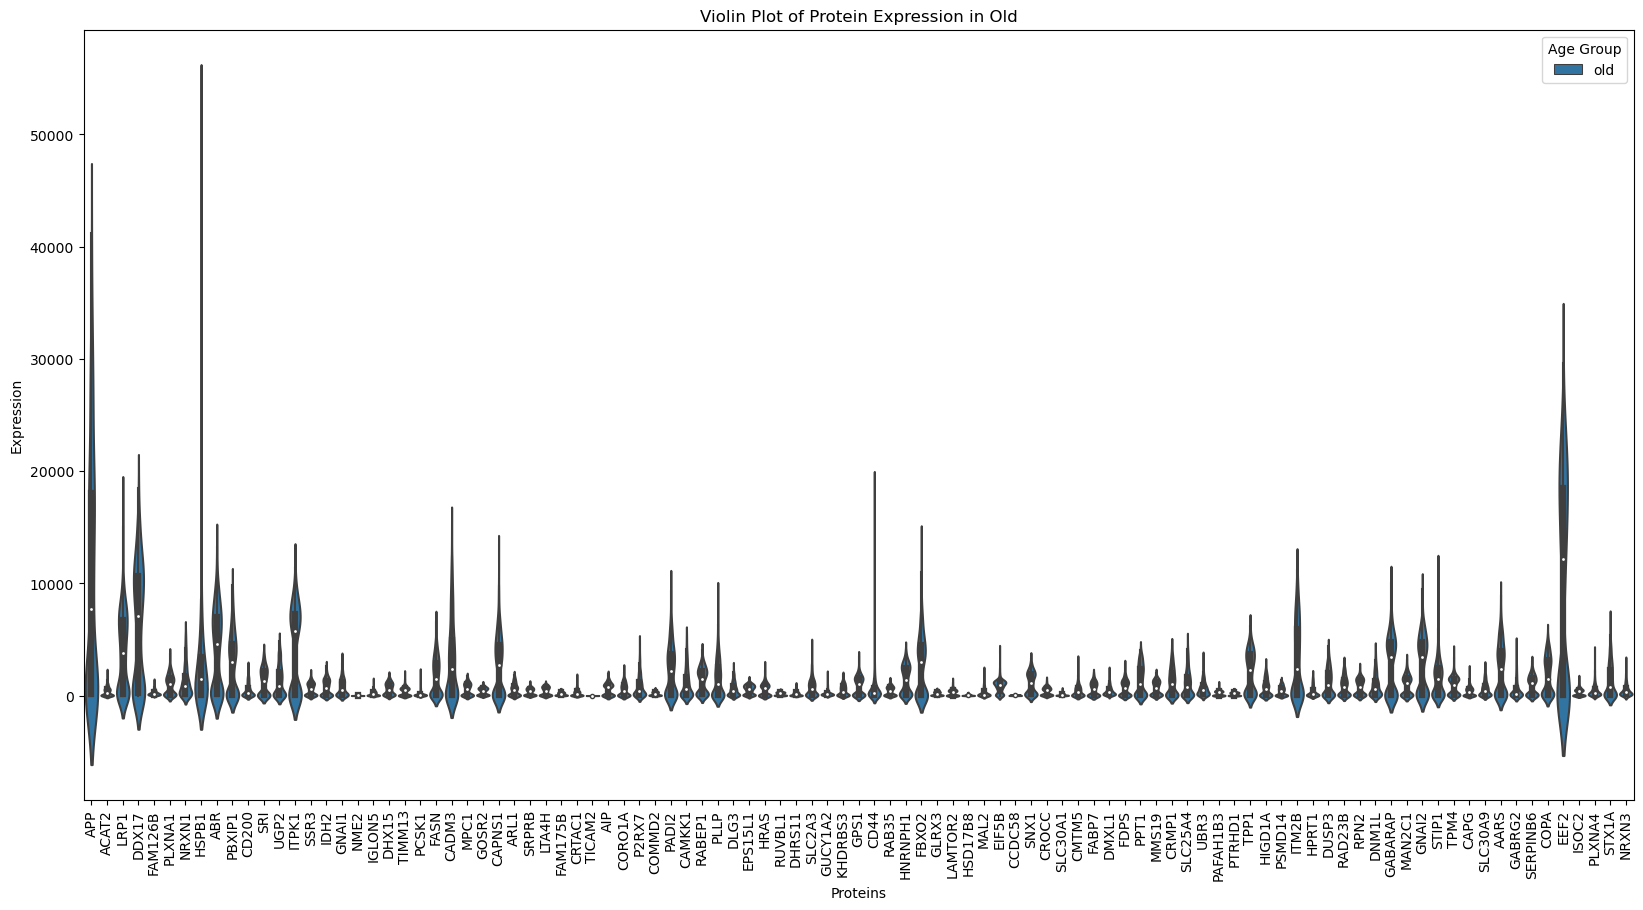

In [185]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def filter_proteins_safe(df, proteins):
    # Check which proteins are in the DataFrame
    available_proteins = [protein for protein in proteins if protein in df.columns]
    
    # Print missing proteins
    missing_proteins = [protein for protein in proteins if protein not in df.columns]
    if missing_proteins:
        print(f"Missing proteins: {missing_proteins}")
    
    # Ensure 'AgeGroup' is preserved during filtering if it's in the DataFrame
    if 'AgeGroup' in df.columns:
        return df[['AgeGroup'] + available_proteins].copy()
    else:
        return df[available_proteins].copy()

def plot_violin_no_split(df, proteins, age_group):
    df_filtered = filter_proteins_safe(df, proteins)
    
    if df_filtered.shape[1] > 1:
        # Check if 'AgeGroup' column exists in the filtered DataFrame
        if 'AgeGroup' not in df_filtered.columns:
            print(f"'AgeGroup' column is missing in {age_group} dataset.")
            return
        
        melted_df = df_filtered.melt(id_vars='AgeGroup', value_vars=[col for col in df_filtered.columns if col != 'AgeGroup'], var_name='Protein', value_name='Expression')
        
        # Ensure 'Expression' column is numeric
        melted_df['Expression'] = pd.to_numeric(melted_df['Expression'], errors='coerce')
        
        plt.figure(figsize=(20, 10))
        sns.violinplot(x='Protein', y='Expression', hue='AgeGroup', data=melted_df, scale='width')
        plt.title(f'Violin Plot of Protein Expression in {age_group}')
        plt.xticks(rotation=90)
        plt.xlabel('Proteins')
        plt.ylabel('Expression')
        plt.legend(title='Age Group')
        plt.show()
    else:
        print(f"Not enough proteins available for violin plot in {age_group} dataset.")

# Example usage
# Assuming you have DataFrames and protein lists defined for each age group
plot_violin_no_split(young_df, normalized_young_proteins, 'Young')
plot_violin_no_split(middle_age_df, normalized_middle_age_proteins, 'Middle Age')
plot_violin_no_split(old_df, normalized_old_proteins, 'Old')
